In [28]:
# importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve,precision_recall_curve,auc,make_scorer
from sklearn.model_selection import cross_val_score, StratifiedKFold

import warnings
warnings.filterwarnings("ignore")

In [29]:
# get the data and save it in a dataframe.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [30]:
df.shape

(8425, 23)

In [31]:
# get the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [32]:
# check the number of missing values for each column.
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [33]:
# Check the number of unique values in the target column.
df['RainTomorrow'].unique()

# There are a few missing values.

array(['No', 'Yes', nan], dtype=object)

In [34]:
# remove the rows with null values in the target column.
df= df[df['RainTomorrow'].notnull()]

In [35]:
# check for duplicates.
df.duplicated().value_counts()

# There are a lot of duplicate entries.

False    6624
True     1562
dtype: int64

In [36]:
# drop the duplicate rows.
df.drop_duplicates(inplace=True,ignore_index=True)

In [37]:
# Convert the 'Date' column to datetime format and extract the Day, Month and Year into separate columns.
df['Date']= pd.to_datetime(df['Date'],format='%Y-%m-%d',dayfirst=True)
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.drop(columns=['Date'],inplace=True)         # delete the 'Date' column as the data has been already extracted.
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

# Let us see some plots of our dataset.

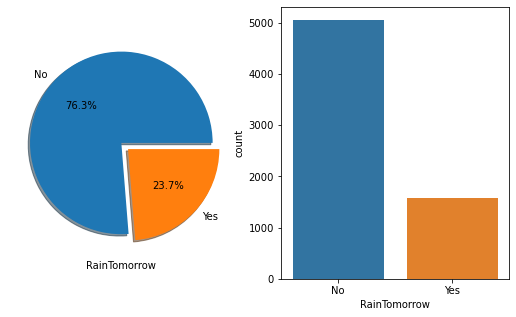

In [38]:
# Plot of target variable i.e. 'RainTomorrow'.
f,ax=plt.subplots(1,2,figsize=(9,5))
df['RainTomorrow'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_ylabel('')
ax[0].set_xlabel('RainTomorrow')
sns.countplot(df['RainTomorrow'],ax=ax[1])
plt.show()

# The target column is moderately imbalanced.

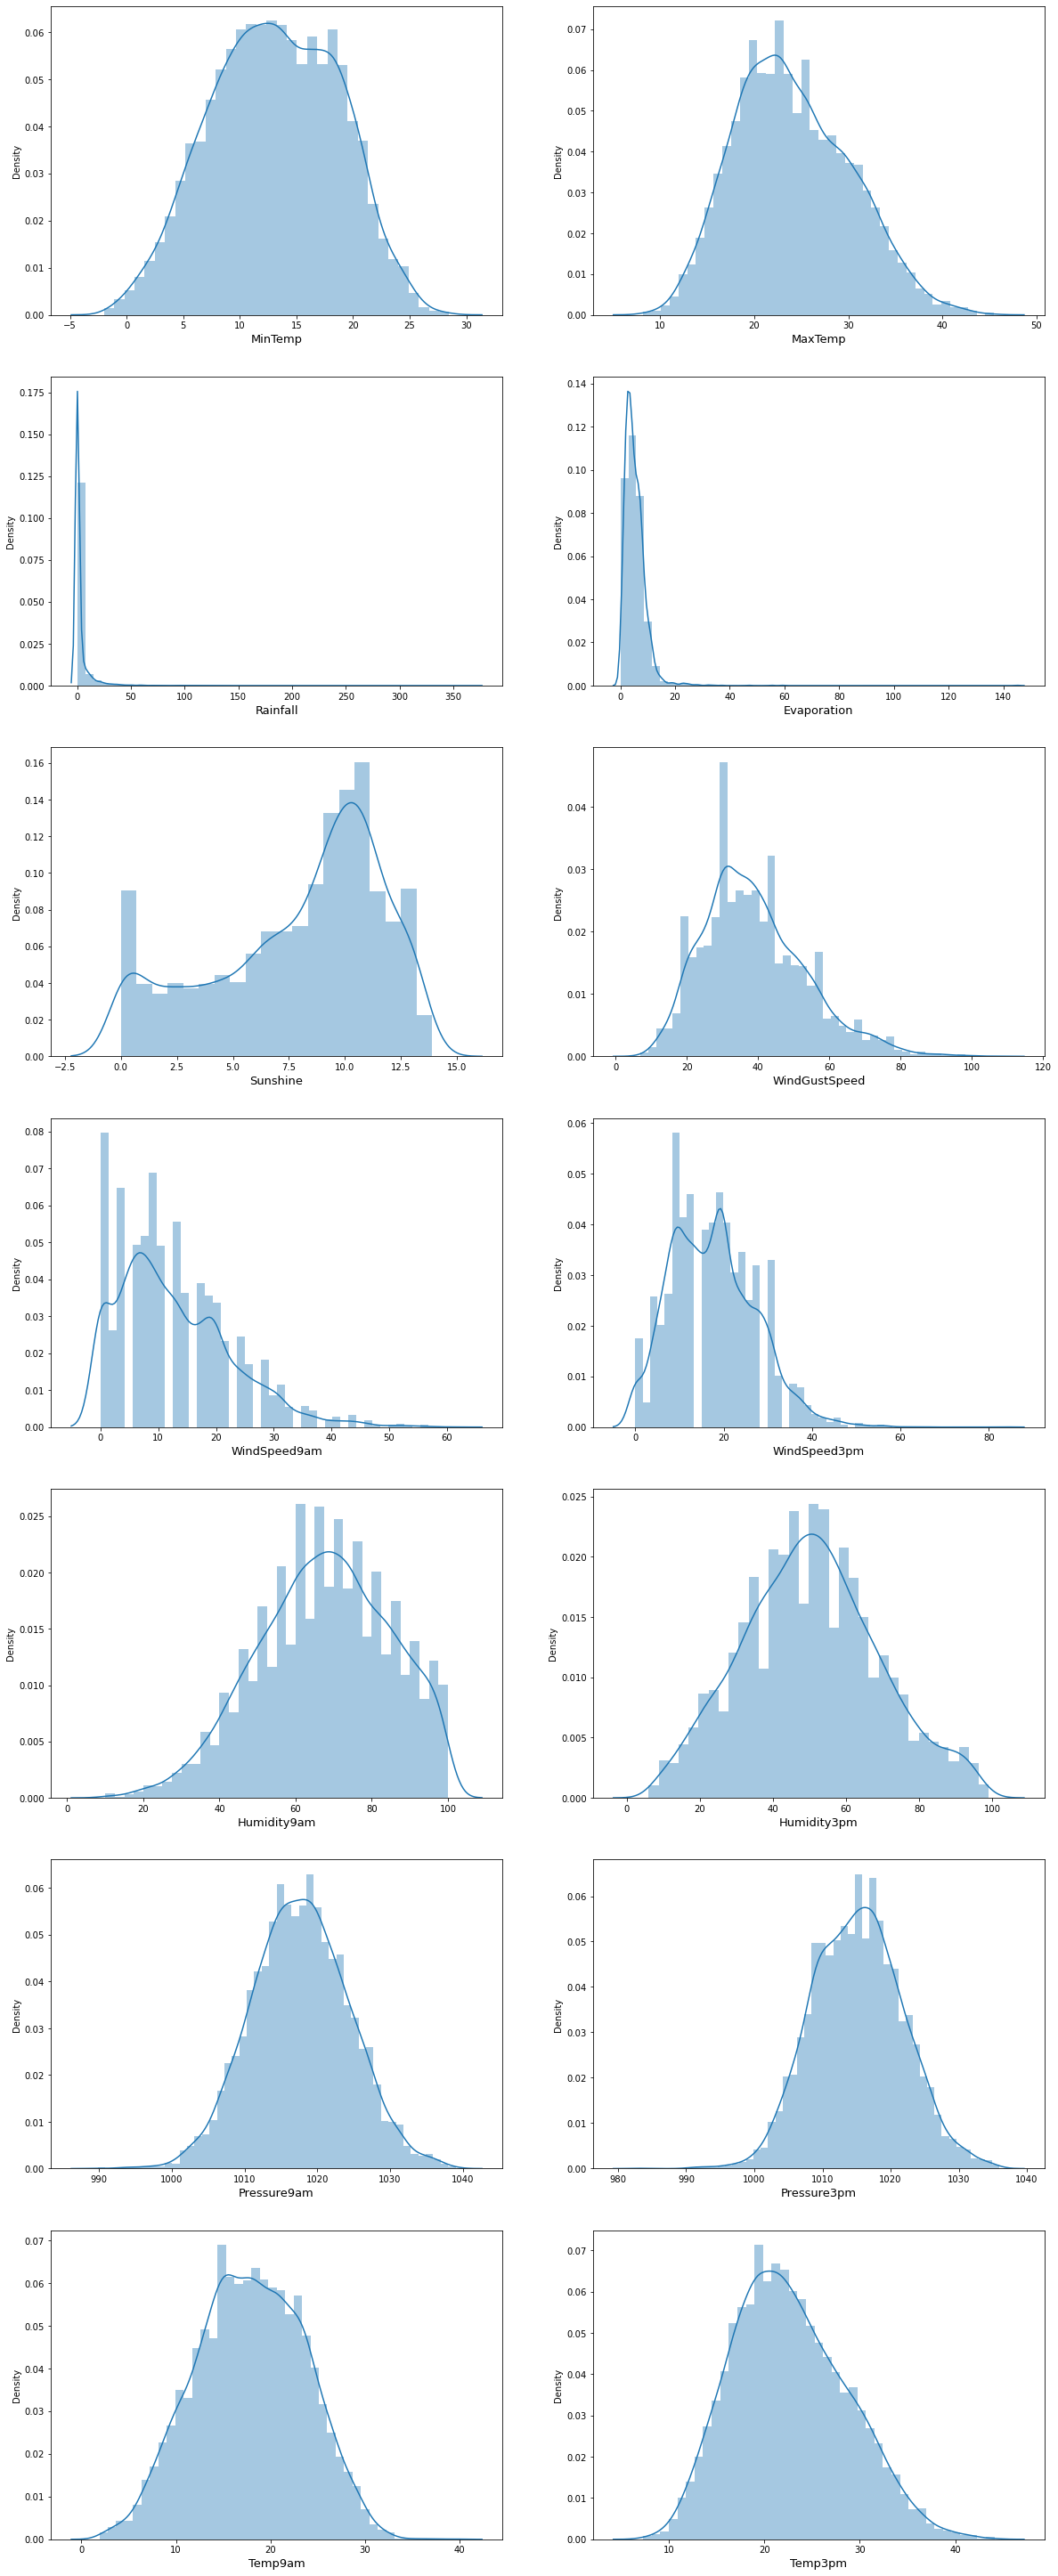

In [39]:
# Distribution plots of the features with continuous data.

df_cont= df[['MinTemp','MaxTemp','Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm']]
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_cont:
    if plotnumber<=16:
        ax= plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=13)
    plotnumber+=1
plt.show()

# 'Rainfall' and 'Evaporation' columns are highly skewed towards right.

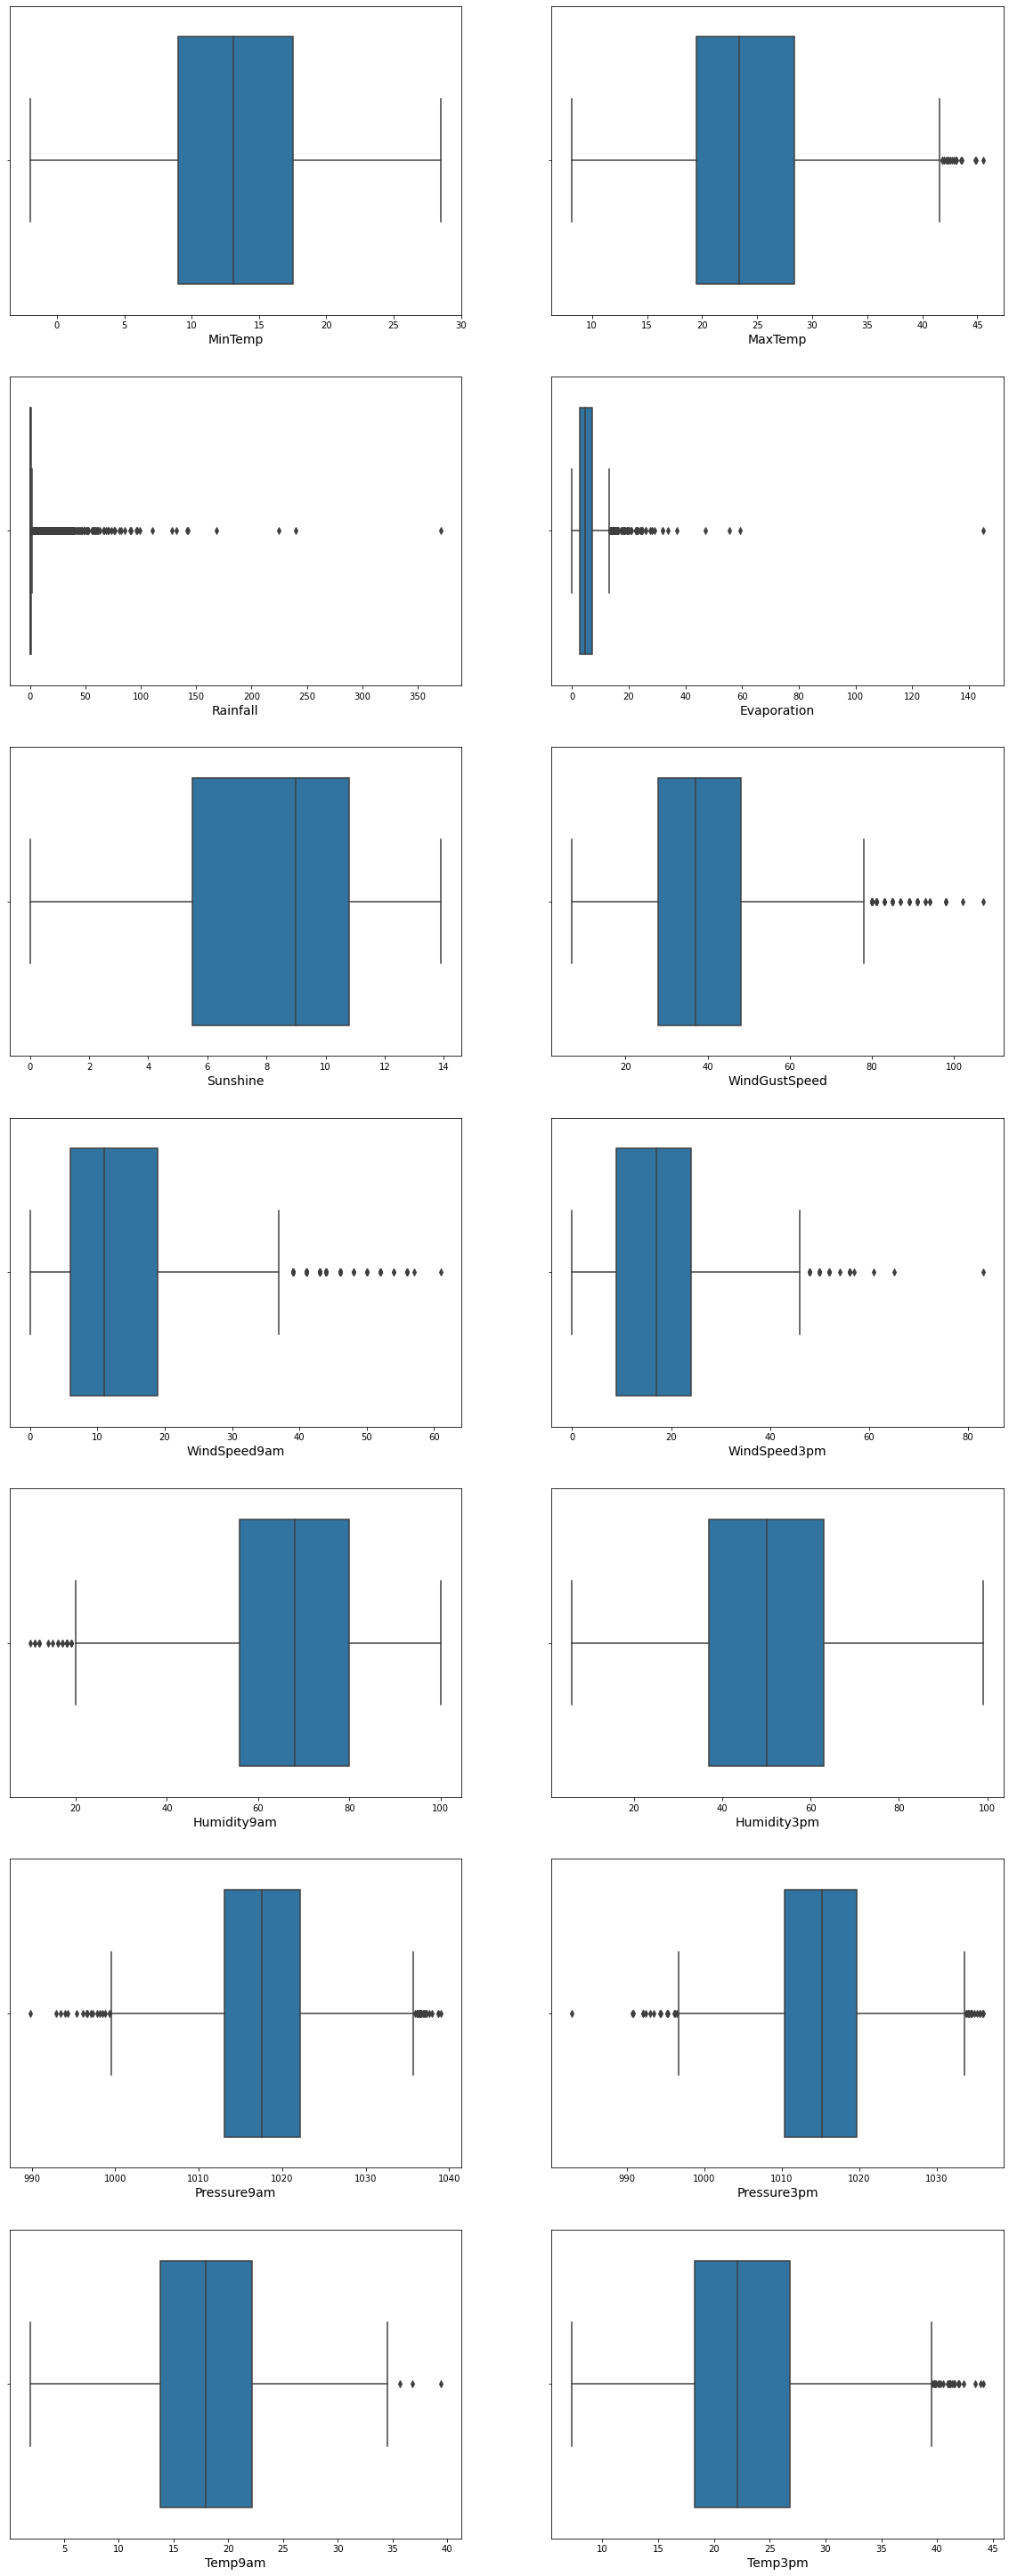

In [40]:
# Now let's see the box-plots of the above features.

df_cont= df[['MinTemp','MaxTemp','Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm']]
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_cont:
    if plotnumber<=16:
        ax= plt.subplot(8,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=14)
    plotnumber+=1
plt.show()


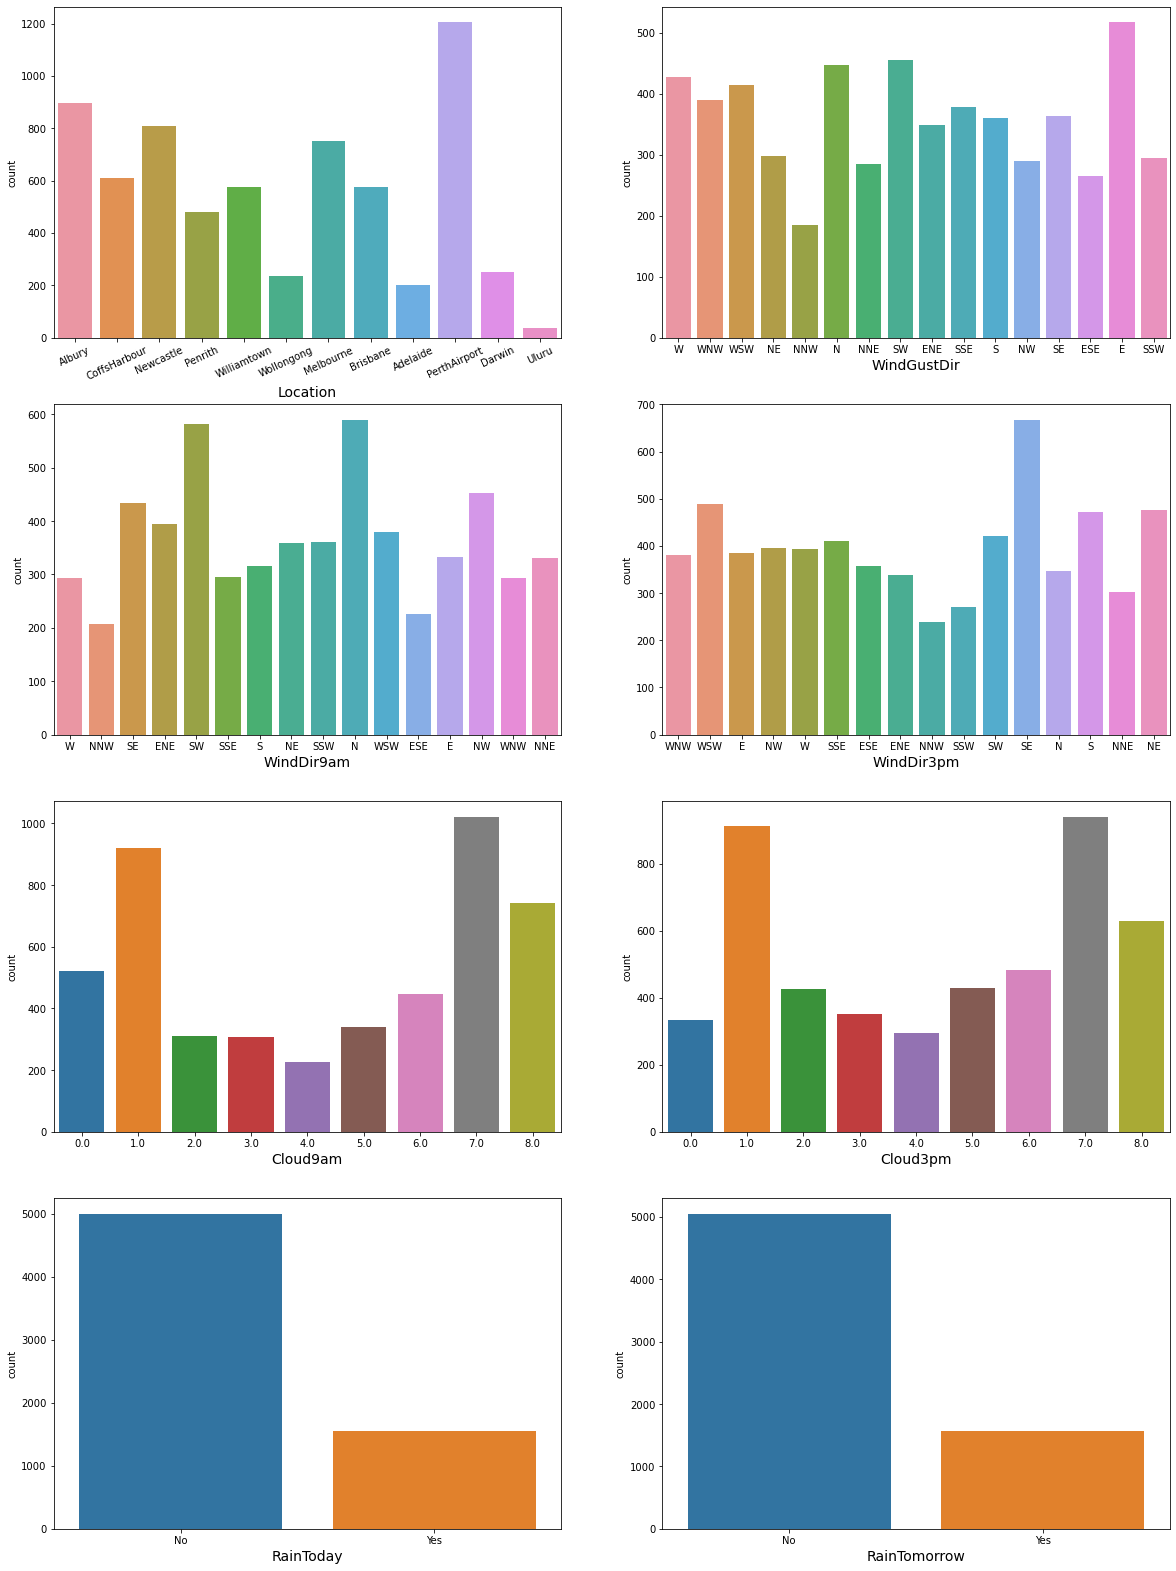

In [41]:
# Count-plots of the features with categorical data.
df_cat=df[['Location','WindGustDir','WindDir9am','WindDir3pm','Cloud9am', 'Cloud3pm','RainToday','RainTomorrow']]
plt.figure(figsize=(20,28))
plotnumber=1
for column in df_cat:
    if plotnumber<=8:
        ax= plt.subplot(4,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=14)
        if column == 'Location':
            plt.xticks(rotation=25)
    plotnumber+=1
plt.show()

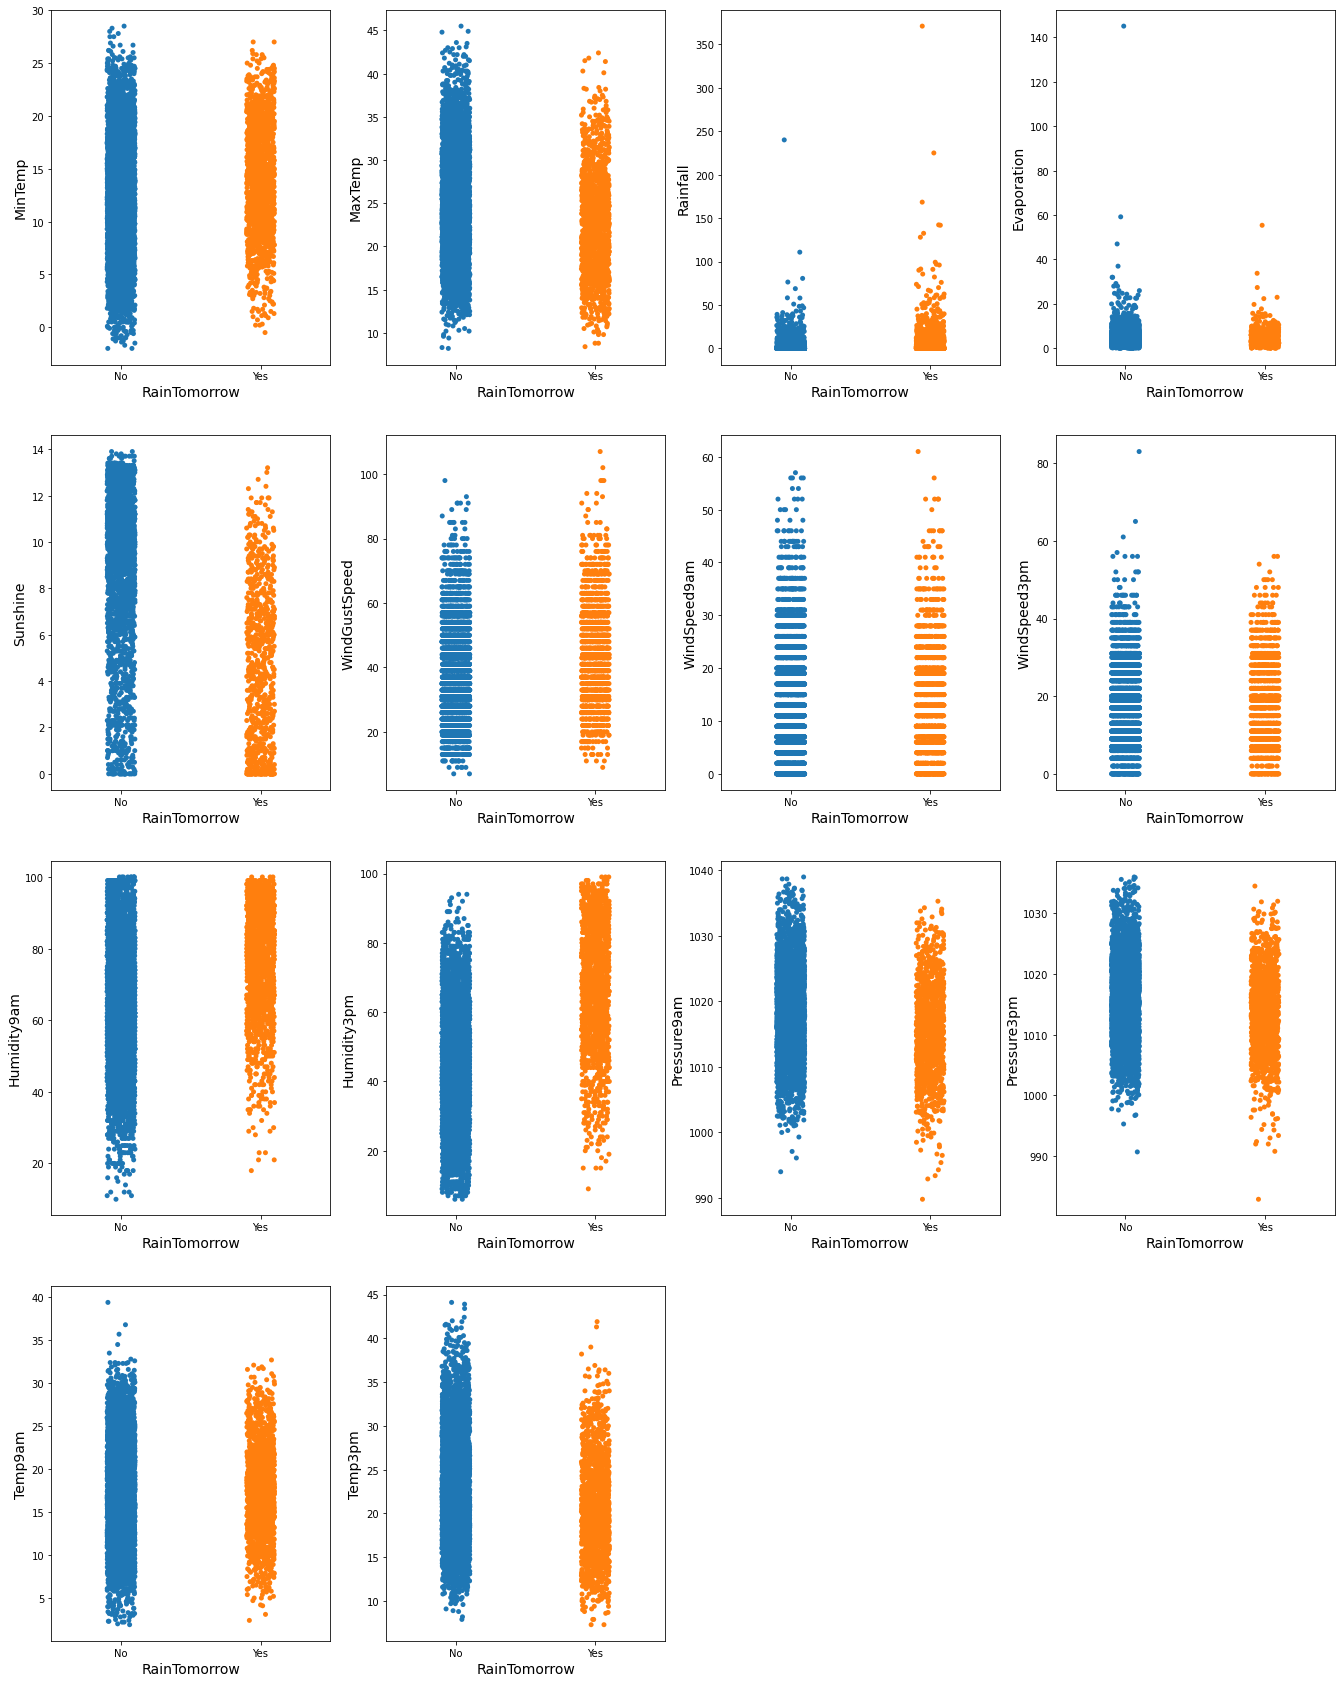

In [42]:
# Strip-plots of our continuous features with respect to the target variable i.e 'RainTomorrow'
plt.figure(figsize=(23,30))
for i in enumerate(df_cont):
    plt.subplot(4,4,i[0]+1)
    sns.stripplot(x='RainTomorrow',y=i[1],data=df)
    plt.xlabel('RainTomorrow',fontsize=14)
    plt.ylabel(i[1],fontsize=14)

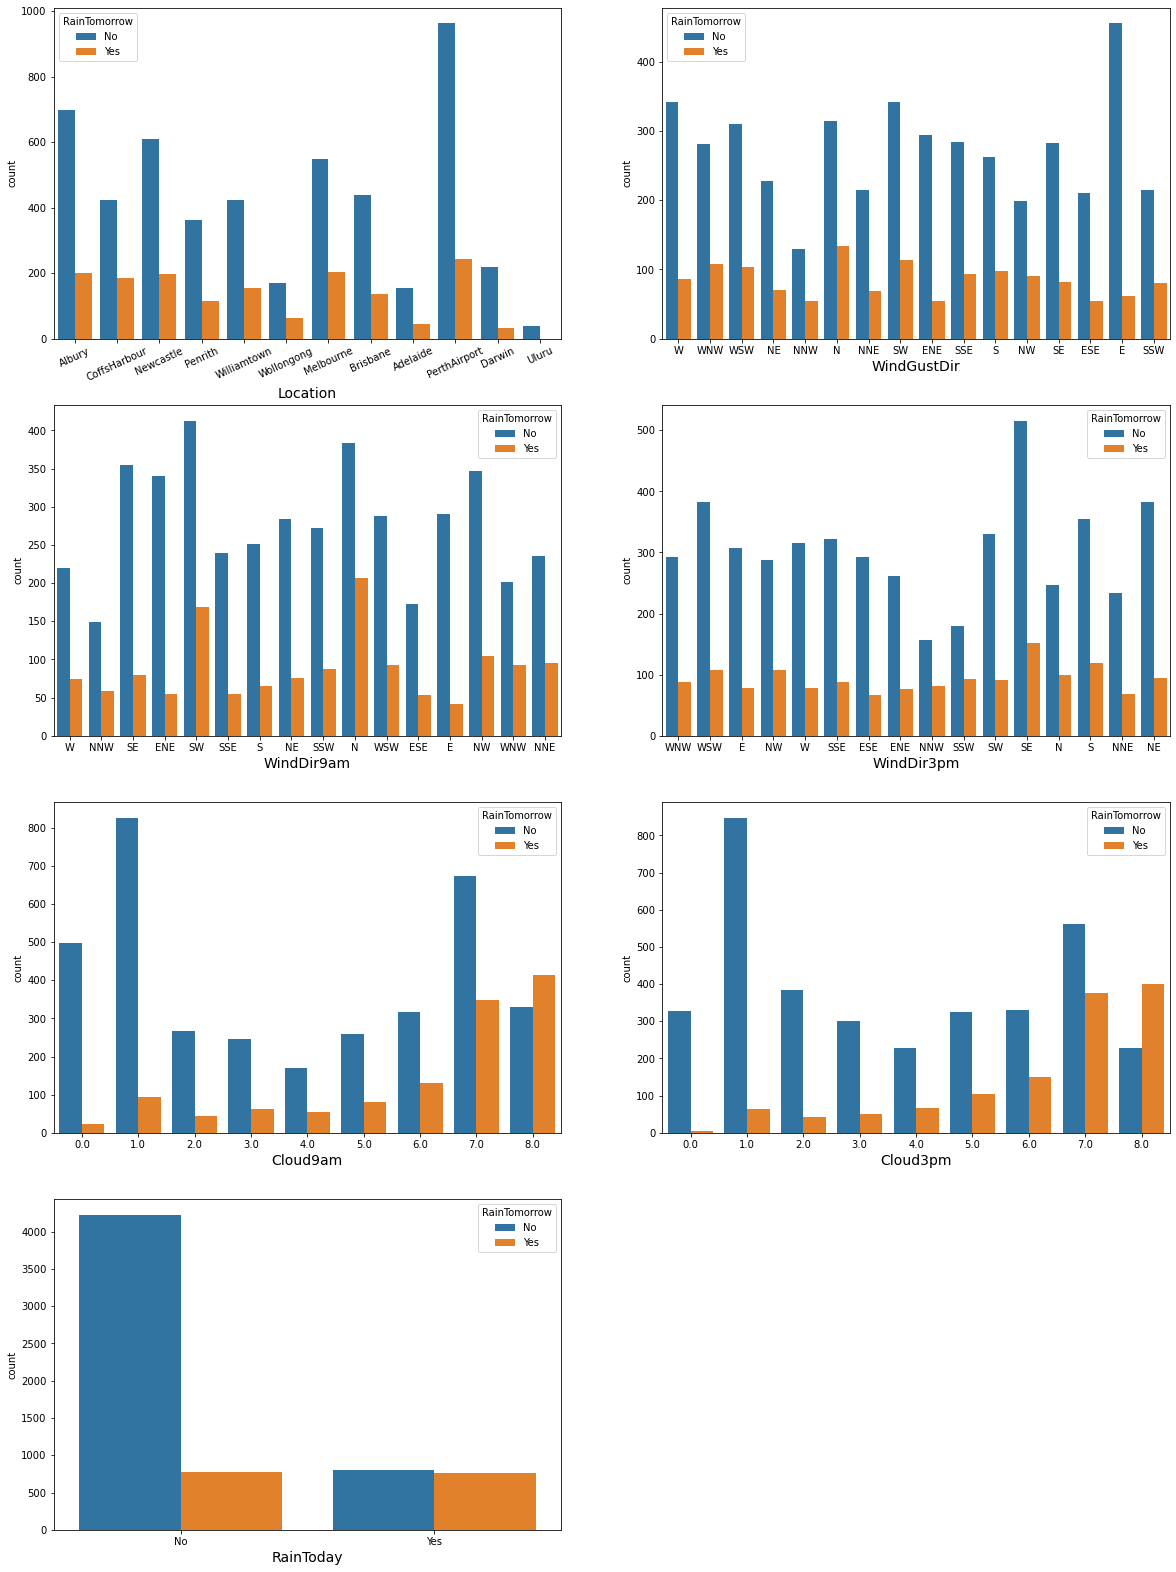

In [43]:
# Count-plots of our categorical features with respect to the target variable i.e 'RainTomorrow'.
df_cat=df[['Location','WindGustDir','WindDir9am','WindDir3pm','Cloud9am', 'Cloud3pm','RainToday','RainTomorrow']]
plt.figure(figsize=(20,28))
plotnumber=1
for column in df_cat:
    if plotnumber<=7:
        ax= plt.subplot(4,2,plotnumber)
        sns.countplot(df[column],hue=df['RainTomorrow'])
        plt.xlabel(column,fontsize=14)
        if column == 'Location':
            plt.xticks(rotation=25)
    plotnumber+=1
plt.show()

# Observations:
# 1. If wind direction at 9am is north or south-west the chances of rainfall tomorrow is higher.
# 2. If the cloud cover is higher(7 or 8) there are more chances of rainfall.
# 3. If it is raining today then there is higher chance of rain tomorrow.

<AxesSubplot:xlabel='Day', ylabel='count'>

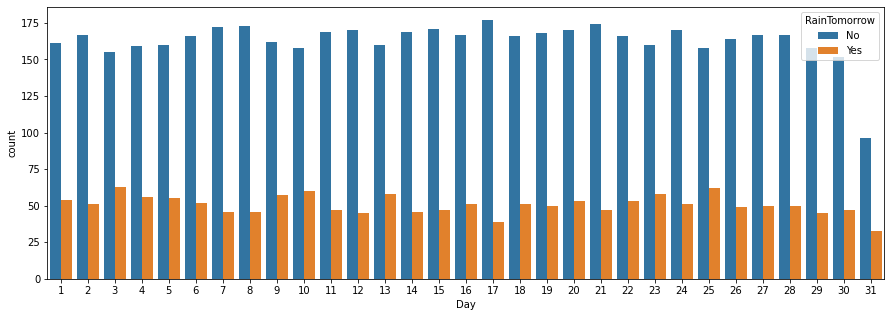

In [44]:
# Count-plot of 'Day' column with respect to the target variable i.e 'RainTomorrow'.
plt.figure(figsize=(15,5))
sns.countplot(df['Day'],hue=df['RainTomorrow'])

<Figure size 1800x2160 with 0 Axes>

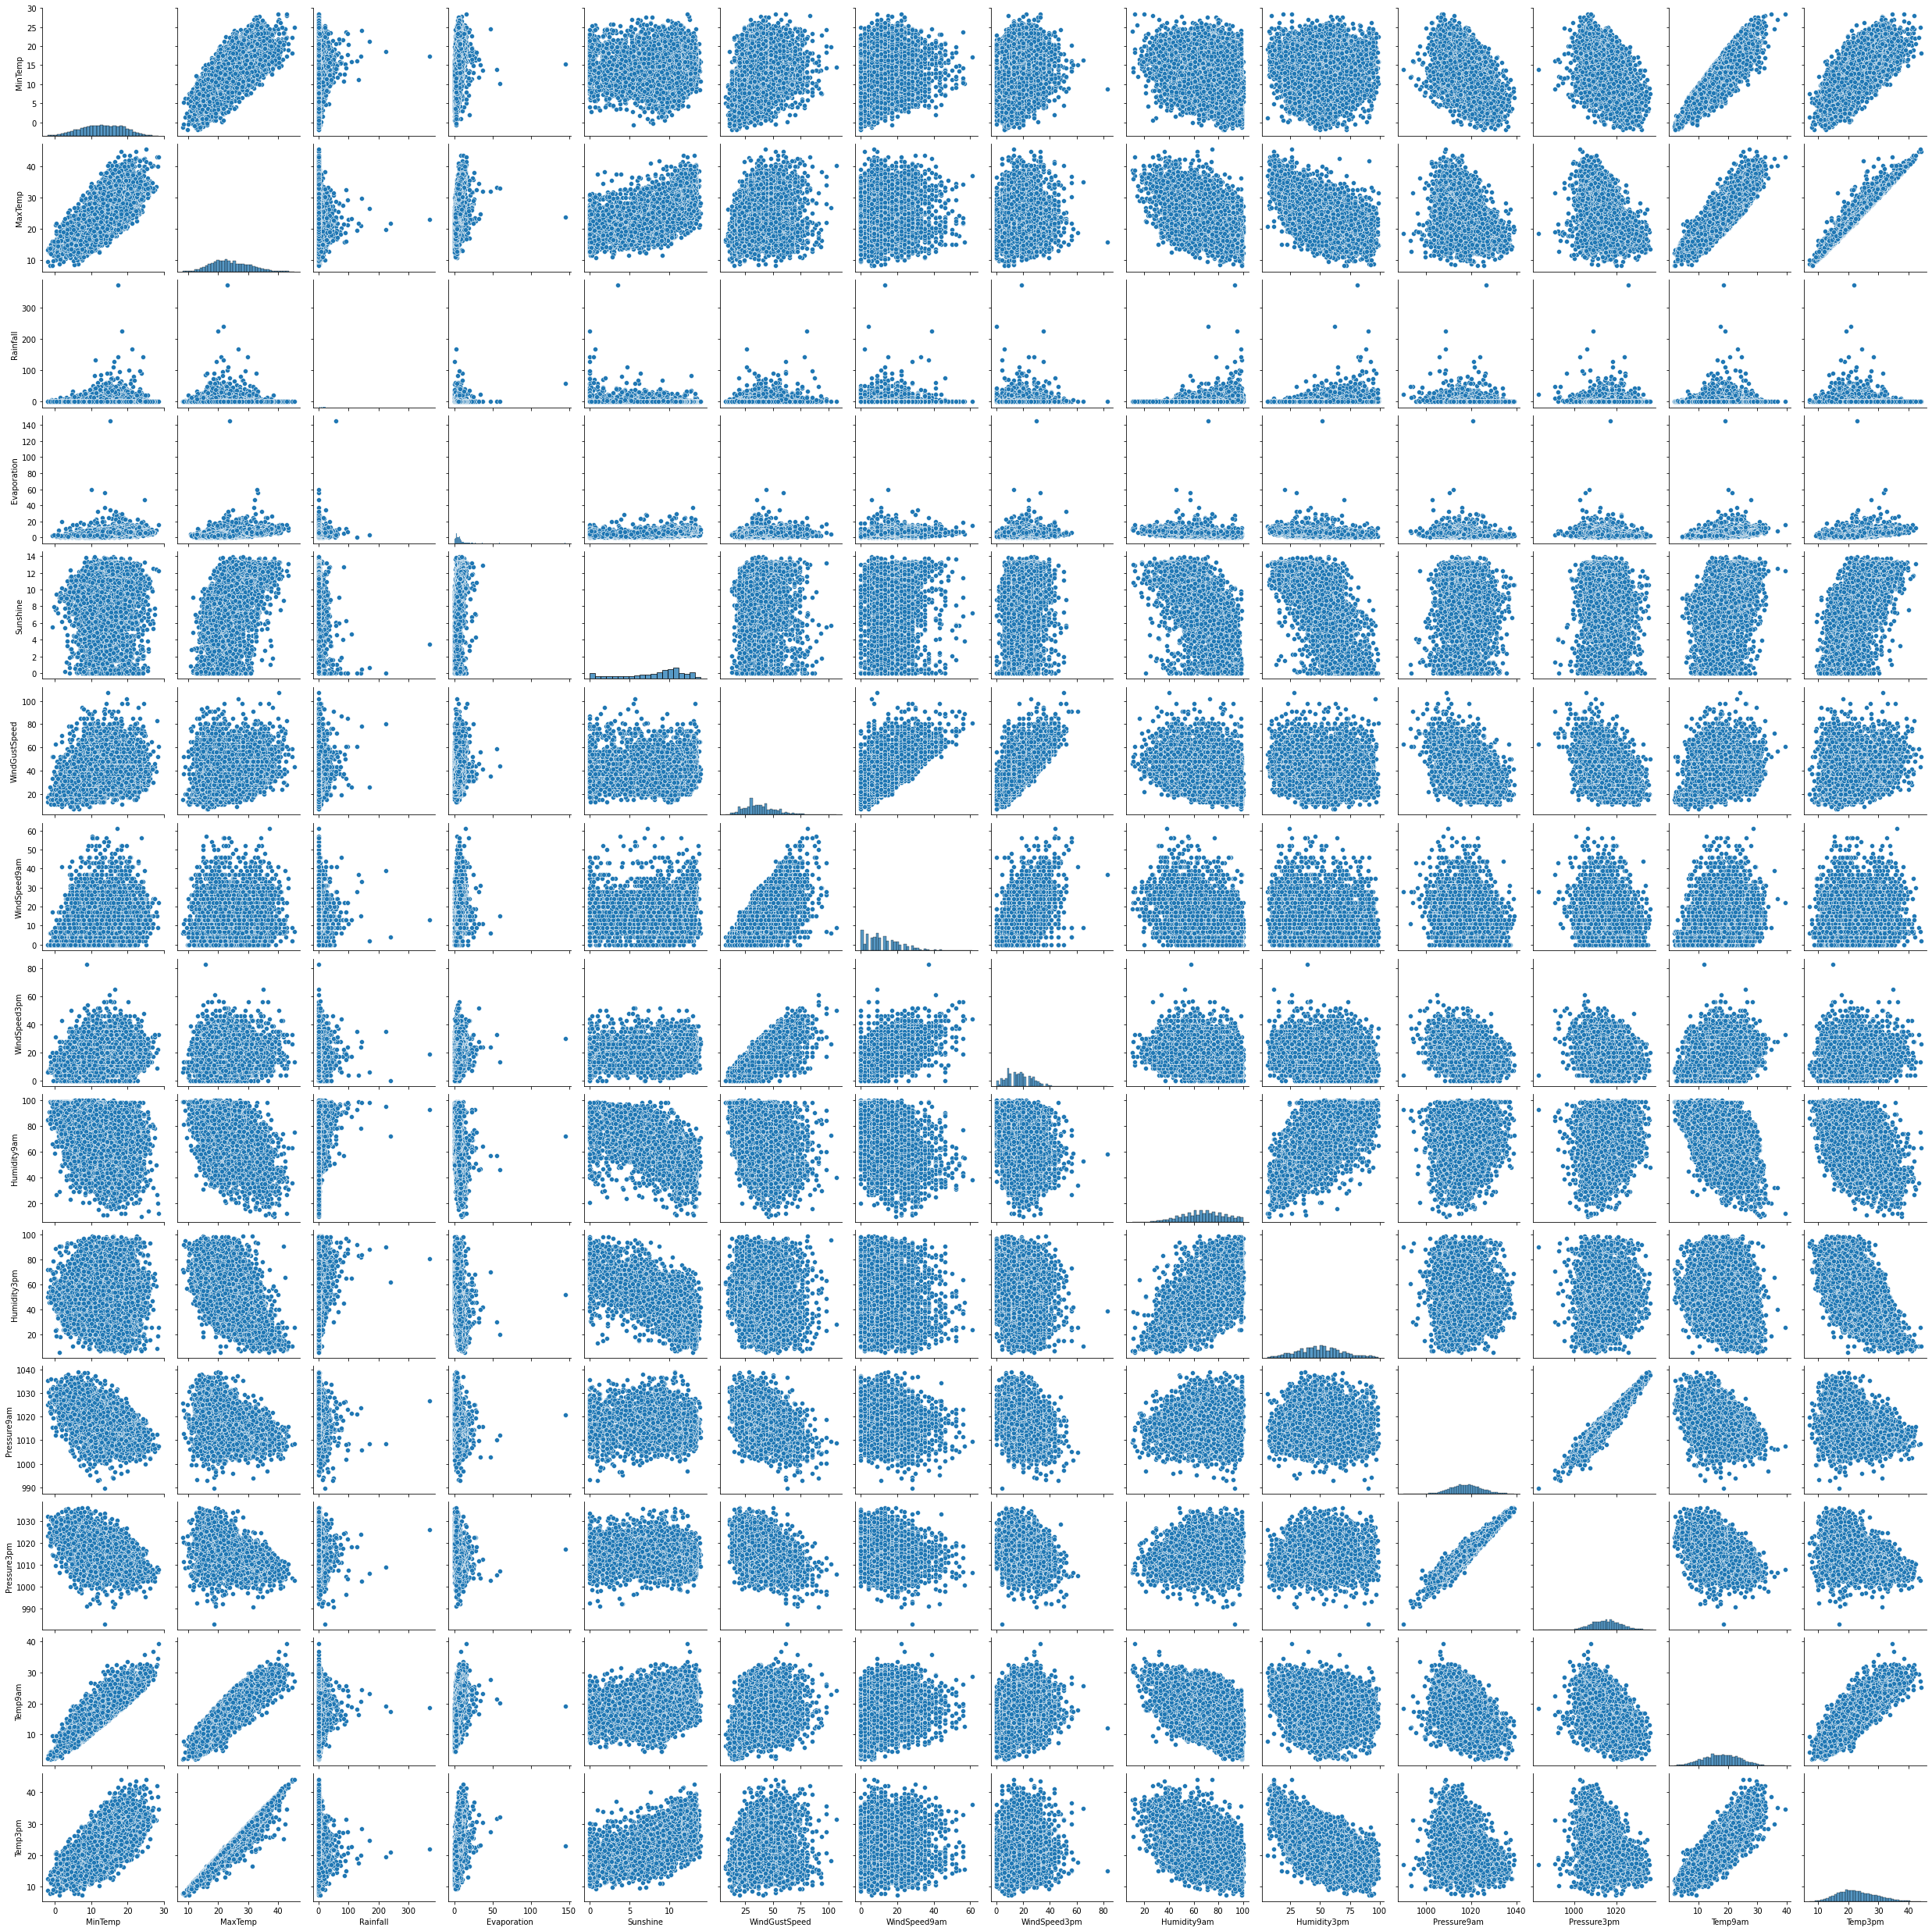

In [45]:
# Pair-plots of our continuous data columns with each other.
plt.figure(figsize=(25,30))
sns.pairplot(df_cont)

# Observations:
# 1. Some of the variables have linear relation among each other. We will get to know more in correlation heatmap.

# Encoding the categorical columns

In [46]:
# Using the map method to encode the wind directions.
# These columns have some missing values, hence doing it manually instead of using predefined encoders.
wind_dir={'N':0, 'NNE':1, 'NE':2, 'ENE':3, 'E':4, 'ESE':5, 'SE':6, 'SSE':7, 'S':8, 'SSW':9,'SW':10,'WSW':11, 'W':12, 'WNW':13,
          'NW':14, 'NNW':15}
df["WindGustDir"] = df["WindGustDir"].map(wind_dir)
df["WindDir9am"] = df["WindDir9am"].map(wind_dir)
df["WindDir3pm"] = df["WindDir3pm"].map(wind_dir)

In [47]:
# Using replace method to encode the 'RainToday' column.
df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})

In [48]:
# Encoding the other categorical object datatype columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['Location']= enc.fit_transform(df[['Location']])
df['RainTomorrow']= enc.fit_transform(df[['RainTomorrow']])
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          NaN       NaN         12.0   
1         1      7.4     25.1       0.0          NaN       NaN         13.0   
2         1     12.9     25.7       0.0          NaN       NaN         11.0   
3         1      9.2     28.0       0.0          NaN       NaN          2.0   
4         1     17.5     32.3       1.0          NaN       NaN         12.0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0        12.0        13.0  ...       1007.1       8.0   
1           44.0        15.0        11.0  ...       1007.8       NaN   
2           46.0        12.0        11.0  ...       1008.7       NaN   
3           24.0         6.0         4.0  ...       1012.8       NaN   
4           41.0         3.0        14.0  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0       NaN     16.9     21.8        0.0             0    1     12  2008  
1       NaN     17.2     24.3        0.0             0    2     12  2008  
2       2.0     21.0     23.2        0.0             0    3     12  2008  
3       NaN     18.1     26.5        0.0             0    4     12  2008  
4       8.0     17.8     29.7        0.0             0    5     12  2008  

[5 rows x 25 columns]

# Imputing using KNN Imputer

In [49]:
# Check the number of missing values.
df.isnull().sum()

Location            0
MinTemp            57
MaxTemp            35
Rainfall           66
Evaporation      2860
Sunshine         3163
WindGustDir       908
WindGustSpeed     908
WindDir9am        778
WindDir3pm        276
WindSpeed9am       51
WindSpeed3pm       83
Humidity9am        41
Humidity3pm        80
Pressure9am      1291
Pressure3pm      1292
Cloud9am         1789
Cloud3pm         1829
Temp9am            38
Temp3pm            76
RainToday          66
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

In [50]:
# Using KNN Imputer to fillup the missing values.
from sklearn.impute import KNNImputer
imputer_knn= KNNImputer(n_neighbors=5)
imputed_df= pd.DataFrame(imputer_knn.fit_transform(df),columns=df.columns)
df= imputed_df
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

# Correlation

<AxesSubplot:>

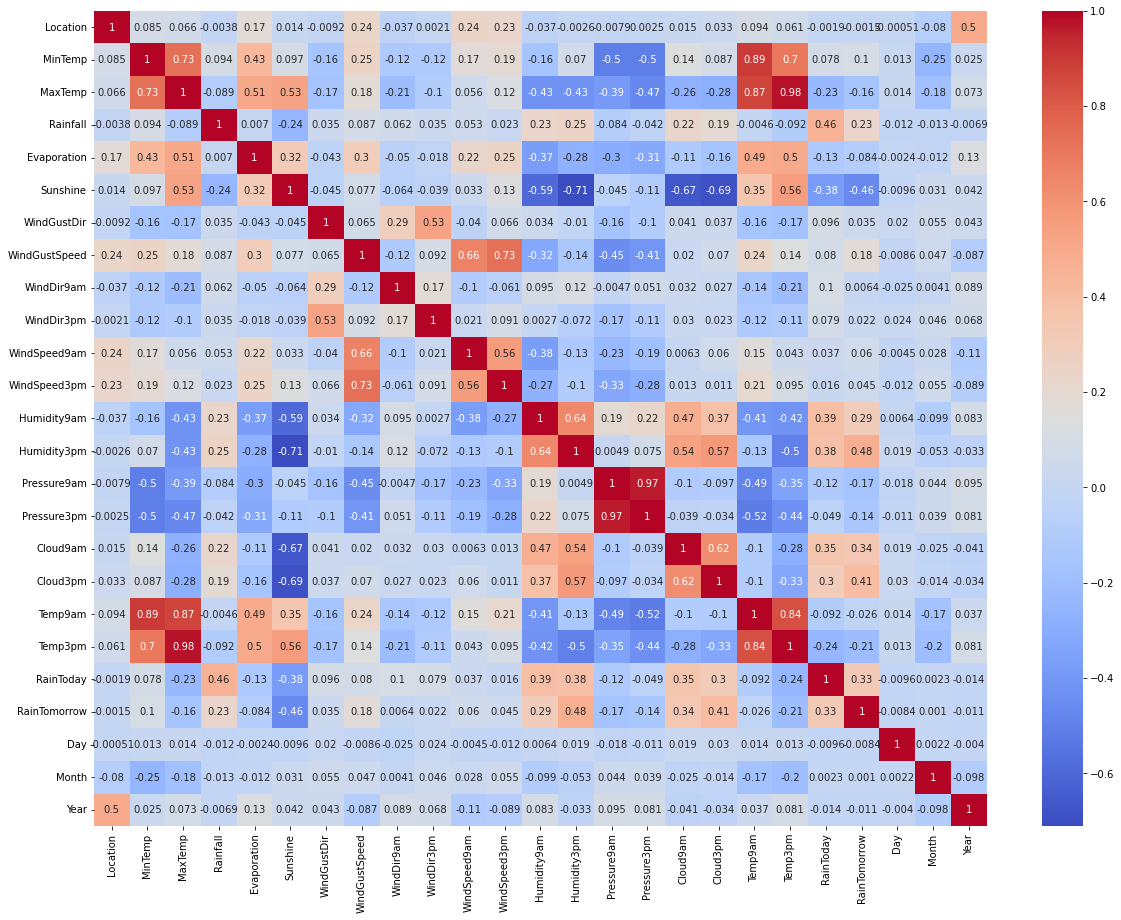

In [51]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# The temperature related columns might have a multicollinearity problem.
# Pressure9am and Pressure3pm have a multicollinearity problem.

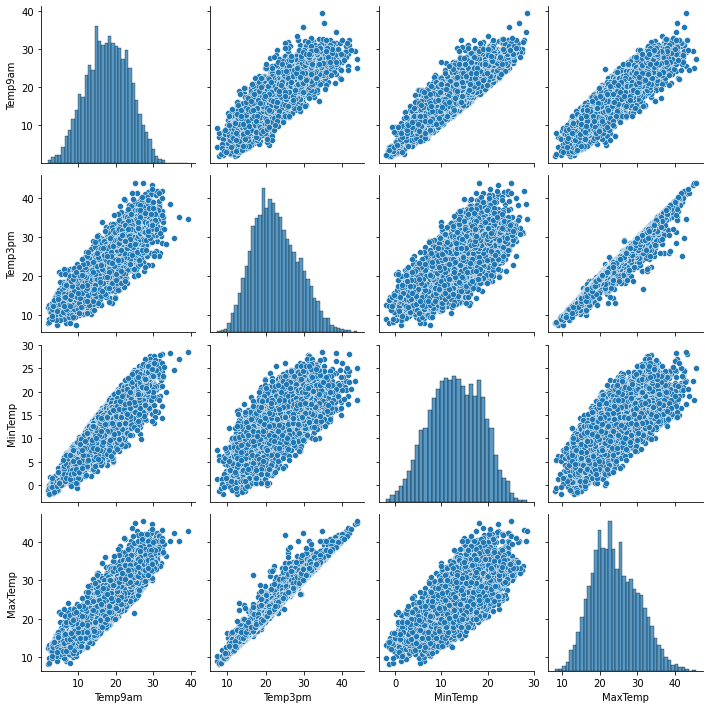

In [52]:
# Pairplots of temperature related columns.
temp_df= df[['Temp9am','Temp3pm','MinTemp','MaxTemp']]
sns.pairplot(temp_df)

# Seems they have a positive linear relation among them.
# MaxTemp and Temp3pm have a strong relation.

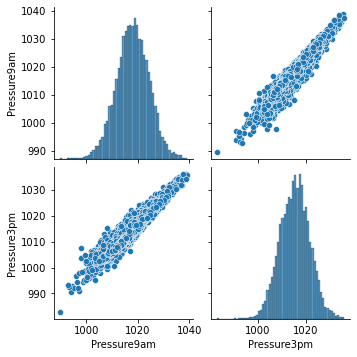

In [53]:
# Pairplot of Pressure9am and Pressure3pm.
press_df= df[['Pressure9am','Pressure3pm']]
sns.pairplot(press_df)

# A strong positive linear relation can be seen.

In [54]:
# Check the correlation of the target variable with the columns.
np.abs(corr["RainTomorrow"]).sort_values(ascending= False)

# Among the features with multicollinearity issues, those with weaker corrrelation with target can be dropped.

RainTomorrow     1.000000
Humidity3pm      0.476207
Sunshine         0.460938
Cloud3pm         0.410136
Cloud9am         0.338852
RainToday        0.329584
Humidity9am      0.293921
Rainfall         0.227706
Temp3pm          0.205280
WindGustSpeed    0.177389
Pressure9am      0.165792
MaxTemp          0.161856
Pressure3pm      0.136626
MinTemp          0.100933
Evaporation      0.084259
WindSpeed9am     0.059710
WindSpeed3pm     0.045201
WindGustDir      0.034671
Temp9am          0.025571
WindDir3pm       0.022204
Year             0.011374
Day              0.008407
WindDir9am       0.006402
Location         0.001460
Month            0.001026
Name: RainTomorrow, dtype: float64

In [55]:
# 'Month','Location','WindDir9am','Day','Year' have very weak relation with target variable.
# Other dropped columns have multicollinearity issues.
df.drop(columns=['Month','Location','WindDir9am','Day','Year','Temp9am','Pressure3pm','MinTemp','MaxTemp'],inplace=True)

# Data Transformation using Power Transformer

In [56]:
# Check the skewness in the continuous numeric columns.
df_cont= df[['Rainfall','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 
             'Humidity9am', 'Humidity3pm','Pressure9am', 'Temp3pm']]
np.abs(df_cont.skew()).sort_values(ascending=False)

Rainfall         13.534572
Evaporation       9.411472
WindSpeed9am      0.941464
WindGustSpeed     0.762859
WindSpeed3pm      0.560322
Sunshine          0.559155
Temp3pm           0.358367
Humidity9am       0.255947
Humidity3pm       0.150204
Pressure9am       0.075191
dtype: float64

In [57]:
# Using power transformer to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

df['Rainfall']= pt.fit_transform(df[['Rainfall']])
df['Evaporation']= pt.fit_transform(df[['Evaporation']])
df['WindSpeed9am']= pt.fit_transform(df[['WindSpeed9am']])
df['WindGustSpeed']= pt.fit_transform(df[['WindGustSpeed']])
df['WindSpeed3pm']= pt.fit_transform(df[['WindSpeed3pm']])
df['Sunshine']= pt.fit_transform(df[['Sunshine']])

df[['Rainfall','Evaporation','WindSpeed9am','WindGustSpeed','WindSpeed3pm']].skew()

Rainfall         1.017995
Evaporation     -0.003726
WindSpeed9am    -0.102597
WindGustSpeed   -0.004782
WindSpeed3pm    -0.041628
dtype: float64

In [58]:
# Separating the features and label.
X= df.drop(columns=['RainTomorrow'])
y= df['RainTomorrow']

In [59]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [60]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)
# 'Rainfall' and 'RainToday' have multicollinearity problem.

         vif       Features
0   9.006991       Rainfall
1   2.259380    Evaporation
2   3.968779       Sunshine
3   1.478521    WindGustDir
4   3.165345  WindGustSpeed
5   1.451722     WindDir3pm
6   2.033347   WindSpeed9am
7   2.410937   WindSpeed3pm
8   2.797711    Humidity9am
9   2.843663    Humidity3pm
10  1.698380    Pressure9am
11  2.206916       Cloud9am
12  2.236417       Cloud3pm
13  2.636789        Temp3pm
14  8.336296      RainToday


In [61]:
# dropping the 'Rainfall' column.
df.drop(columns=['Rainfall'],inplace=True)

In [62]:
# After the drop operation we have to get the updated features in X and scale them.
# Separating the features and label.
X= df.drop(columns=['RainTomorrow'])
y= df['RainTomorrow']

# applying standard scaler on the features and scaling them.
X_scaled= scaler.fit_transform(X)

In [63]:
# Let's check the vif scores now.
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

         vif       Features
0   2.259339    Evaporation
1   3.964879       Sunshine
2   1.477974    WindGustDir
3   3.161136  WindGustSpeed
4   1.449631     WindDir3pm
5   2.033304   WindSpeed9am
6   2.410936   WindSpeed3pm
7   2.753866    Humidity9am
8   2.840647    Humidity3pm
9   1.695380    Pressure9am
10  2.204990       Cloud9am
11  2.235976       Cloud3pm
12  2.636450        Temp3pm
13  1.357747      RainToday


# Classification Algorithms and their performance evaluation

In [ ]:
# With the help of model we have to predict whether or not it is going to rain tomorrow.
# Since it is important to get overall more correct predictions, hence should focus on overall accuracy of the model.

In [64]:
# defining a function that takes the model and training data as arguements and prints the performance results.
def model_output(model,train_x,train_y):
    model.fit(train_x, train_y)
    y_pred= model.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    precision, recall, _= precision_recall_curve(y_test,y_pred)

    print("Testing Score:",round(accuracy_test*100,2))
    print("Precision:",round(precision_score(y_test,y_pred)*100,2))
    print("Recall:",round(recall_score(y_test,y_pred)*100,2))
    print("f1-score:",round(f1_score(y_test,y_pred)*100,2))
    print("\n",confusion_matrix(y_test,y_pred))

In [65]:
# Since our target variable is moderately imbalanced hence using SMOTE oversampling technique.
from imblearn.over_sampling import SMOTE
over_sample= SMOTE(0.8,random_state=5)

In [66]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(lr,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 79.7
Precision: 55.53
Recall: 71.97
f1-score: 62.69

 [[830 181]
 [ 88 226]]


####################  Sample 1 Results #####################
Testing Score: 82.34
Precision: 60.7
Recall: 72.29
f1-score: 65.99

 [[864 147]
 [ 87 227]]


####################  Sample 2 Results #####################
Testing Score: 81.06
Precision: 58.68
Recall: 67.83
f1-score: 62.92

 [[861 150]
 [101 213]]


####################  Sample 3 Results #####################
Testing Score: 80.83
Precision: 57.28
Recall: 75.16
f1-score: 65.01

 [[835 176]
 [ 78 236]]


####################  Sample 4 Results #####################
Testing Score: 81.06
Precision: 58.68
Recall: 67.83
f1-score: 62.92

 [[861 150]
 [101 213]]


####################  Sample 5 Results #####################
Testing Score: 79.02
Precision: 54.79
Recall: 65.61
f1-score: 59.71

 [[841 170]
 [108 206]]


####################  Sample 6 Results #####################
Testi

In [67]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_jobs=-1)

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(rf,x_train_ns,y_train_ns)
    print("\n")


####################  Sample 0 Results #####################
Testing Score: 82.19
Precision: 62.04
Recall: 64.01
f1-score: 63.01

 [[888 123]
 [113 201]]


####################  Sample 1 Results #####################
Testing Score: 84.68
Precision: 68.69
Recall: 64.97
f1-score: 66.78

 [[918  93]
 [110 204]]


####################  Sample 2 Results #####################
Testing Score: 82.34
Precision: 65.04
Recall: 55.1
f1-score: 59.66

 [[918  93]
 [141 173]]


####################  Sample 3 Results #####################
Testing Score: 83.09
Precision: 64.15
Recall: 64.97
f1-score: 64.56

 [[897 114]
 [110 204]]


####################  Sample 4 Results #####################
Testing Score: 83.47
Precision: 67.79
Recall: 57.64
f1-score: 62.31

 [[925  86]
 [133 181]]


####################  Sample 5 Results #####################
Testing Score: 81.96
Precision: 63.07
Recall: 57.64
f1-score: 60.23

 [[905 106]
 [133 181]]


####################  Sample 6 Results #####################
Test

In [68]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(knn,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results  #####################
Testing Score: 73.51
Precision: 45.95
Recall: 66.88
f1-score: 54.47

 [[764 247]
 [104 210]]


####################  Sample 1 Results  #####################
Testing Score: 78.19
Precision: 53.0
Recall: 70.38
f1-score: 60.47

 [[815 196]
 [ 93 221]]


####################  Sample 2 Results  #####################
Testing Score: 74.19
Precision: 46.76
Recall: 64.33
f1-score: 54.16

 [[781 230]
 [112 202]]


####################  Sample 3 Results  #####################
Testing Score: 75.62
Precision: 48.98
Recall: 68.79
f1-score: 57.22

 [[786 225]
 [ 98 216]]


####################  Sample 4 Results  #####################
Testing Score: 74.94
Precision: 47.78
Recall: 61.78
f1-score: 53.89

 [[799 212]
 [120 194]]


####################  Sample 5 Results  #####################
Testing Score: 75.02
Precision: 48.01
Recall: 65.29
f1-score: 55.33

 [[789 222]
 [109 205]]


####################  Sample 6 Results  ###################

In [69]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
svc= SVC()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i} Results #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(svc,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0 Results #####################
Testing Score: 78.64
Precision: 54.16
Recall: 64.33
f1-score: 58.81

 [[840 171]
 [112 202]]


####################  Sample 1 Results #####################
Testing Score: 80.08
Precision: 57.44
Recall: 61.46
f1-score: 59.38

 [[868 143]
 [121 193]]


####################  Sample 2 Results #####################
Testing Score: 79.17
Precision: 55.79
Recall: 58.28
f1-score: 57.01

 [[866 145]
 [131 183]]


####################  Sample 3 Results #####################
Testing Score: 80.08
Precision: 56.87
Recall: 65.92
f1-score: 61.06

 [[854 157]
 [107 207]]


####################  Sample 4 Results #####################
Testing Score: 81.21
Precision: 59.76
Recall: 63.38
f1-score: 61.51

 [[877 134]
 [115 199]]


####################  Sample 5 Results #####################
Testing Score: 78.26
Precision: 53.76
Recall: 59.24
f1-score: 56.36

 [[851 160]
 [128 186]]


####################  Sample 6 Results #####################
Tes

In [70]:
################################################# ADABOOST CLASSIFIER ##########################################################

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()

for i in range(0,11):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i,stratify=y)
    print(f'####################  Sample {i}  #####################')
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    model_output(ada,x_train_ns,y_train_ns)
    print("\n")

####################  Sample 0  #####################
Testing Score: 79.77
Precision: 55.61
Recall: 72.61
f1-score: 62.98

 [[829 182]
 [ 86 228]]


####################  Sample 1  #####################
Testing Score: 82.19
Precision: 60.48
Recall: 71.66
f1-score: 65.6

 [[864 147]
 [ 89 225]]


####################  Sample 2  #####################
Testing Score: 79.85
Precision: 56.93
Recall: 61.46
f1-score: 59.11

 [[865 146]
 [121 193]]


####################  Sample 3  #####################
Testing Score: 80.98
Precision: 57.91
Recall: 72.29
f1-score: 64.31

 [[846 165]
 [ 87 227]]


####################  Sample 4  #####################
Testing Score: 81.81
Precision: 61.16
Recall: 63.69
f1-score: 62.4

 [[884 127]
 [114 200]]


####################  Sample 5  #####################
Testing Score: 79.85
Precision: 56.44
Recall: 65.61
f1-score: 60.68

 [[852 159]
 [108 206]]


####################  Sample 6  #####################
Testing Score: 80.45
Precision: 57.14
Recall: 70.06
f1

# Cross-Validation using StratifiedKFold

In [71]:
# defining a function that takes train, test data and the model and returns the accuracy_score.
def training_acc(train, test, model):
    x_train = train.drop(['RainTomorrow'],axis=1)
    y_train = train.RainTomorrow
    x_test = test.drop(['RainTomorrow'],axis=1)
    y_test = test.RainTomorrow
    x_train_ns,y_train_ns= over_sample.fit_resample(x_train,y_train)
    
    model.fit(x_train_ns, y_train_ns)
    y_pred= model.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    return score

In [72]:
# cross-validating the accuracy of Logistic-Regression model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, lr)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7916734880009122
For 6-Fold the accuracy is 0.7897041062801932
For 7-Fold the accuracy is 0.7865340867231784
For 8-Fold the accuracy is 0.7868357487922706
For 9-Fold the accuracy is 0.7869867149758454
For 10-Fold the accuracy is 0.787432616551152


In [73]:
# cross-validating the accuracy of Random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, rf)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.8132603317562561
For 6-Fold the accuracy is 0.8120471014492753
For 7-Fold the accuracy is 0.8126455700925875
For 8-Fold the accuracy is 0.8159722222222222
For 9-Fold the accuracy is 0.8138586956521741
For 10-Fold the accuracy is 0.8130966539532383


In [74]:
# cross-validating the accuracy of KNN model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, knn)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7329494385224876
For 6-Fold the accuracy is 0.7272041062801932
For 7-Fold the accuracy is 0.7225242280619114
For 8-Fold the accuracy is 0.7266002415458939
For 9-Fold the accuracy is 0.7315821256038647
For 10-Fold the accuracy is 0.732488049832994


In [75]:
# cross-validating the accuracy of SVC model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, svc)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7860905204355013
For 6-Fold the accuracy is 0.7842693236714976
For 7-Fold the accuracy is 0.7851847079763878
For 8-Fold the accuracy is 0.7877415458937198
For 9-Fold the accuracy is 0.7872886473429951
For 10-Fold the accuracy is 0.7870013169106824


In [76]:
# cross-validating the accuracy of Adaboost model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, ada)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.7992216838625092
For 6-Fold the accuracy is 0.7930253623188405
For 7-Fold the accuracy is 0.7977052907064449
For 8-Fold the accuracy is 0.7974033816425121
For 9-Fold the accuracy is 0.796346618357488
For 10-Fold the accuracy is 0.7980048119642931


In [ ]:
# According to cross-validation results the Random-Forests model is giving the best accuracy results.
# Let's try to tune it further.

# Hyperparameter Tuning

In [77]:
#Hyperparameter tuning of Random Forests Classifier using GridSearchCV.

params= {"criterion":['gini', 'entropy'],
         "n_estimators":[100,250,500],
         "max_depth" :[7,9,11,13,15],
         "min_samples_split": range(2,5)    
         }
grd_rf= GridSearchCV(rf, param_grid=params,cv=5,n_jobs=-1)
grd_rf.fit(x_train,y_train)
print("Best Parameters:",grd_rf.best_params_)

Best Parameters: {'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 3, 'n_estimators': 250}


In [78]:
# Performance of the tuned Random Forests model on a train-test split.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=10,stratify=y)
rf_tuned= grd_rf.best_estimator_
x_train_ns,y_train_ns=over_sample.fit_resample(x_train,y_train)
rf_tuned.fit(x_train, y_train)
    
y_pred= rf_tuned.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2))
print("Precision:",round(precision_score(y_test,y_pred)*100,2))
print("Recall:",round(recall_score(y_test,y_pred)*100,2))
print("f1-score:",round(f1_score(y_test,y_pred)*100,2),"\n")

print("++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++","\n")
print(classification_report(y_test,y_pred,digits=2))

print("++++++++++++++ CONFUSION MATRIX ++++++++++++++++")
print("\n",confusion_matrix(y_test,y_pred),"\n")


Testing Score: 84.6
Precision: 77.5
Recall: 49.36
f1-score: 60.31 

++++++++++++++ CLASSIFICATION REPORT ++++++++++++++++ 

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.90      1011
         1.0       0.78      0.49      0.60       314

    accuracy                           0.85      1325
   macro avg       0.82      0.72      0.75      1325
weighted avg       0.84      0.85      0.83      1325

++++++++++++++ CONFUSION MATRIX ++++++++++++++++

 [[966  45]
 [159 155]] 



In [79]:
# cross-validating the accuracy of tuned random-Forests model.
for i in range(5,11):
    skf= StratifiedKFold(n_splits=i)
    fold_no = 1
    scores=[]
    for train_index,test_index in skf.split(X_scaled, y):
        train = df.iloc[train_index,:]
        test = df.iloc[test_index,:]
        get_score= training_acc(train, test, rf_tuned)
        scores.append(get_score)
        fold_no += 1
    avg_score= sum(scores)/len(scores)
    print(f'For {i}-Fold the accuracy is {avg_score}')

For 5-Fold the accuracy is 0.8125070968477456
For 6-Fold the accuracy is 0.8108393719806762
For 7-Fold the accuracy is 0.8082684609906438
For 8-Fold the accuracy is 0.8106884057971014
For 9-Fold the accuracy is 0.8149154589371981
For 10-Fold the accuracy is 0.8137029341134546


# Part2: Predicting the amount of Rainfall.

In [2]:
# get the data and saving it in a dataframe
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
# drop the duplicate rows.
df.drop_duplicates(inplace=True,ignore_index=True)
# Convert the 'Date' column to datetime format and extract the Day, Month and Year into separate columns.
df['Date']= pd.to_datetime(df['Date'],format='%Y-%m-%d',dayfirst=True)
df['Day']= df['Date'].dt.day
df['Month']= df['Date'].dt.month
df['Year']= df['Date'].dt.year
df.drop(columns=['Date'],inplace=True)         # delete the 'Date' column as the data has been already extracted.
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0     16.9     21.8         No            No    1     12  2008  
1     17.2     24.3         No            No    2     12  2008  
2     21.0     23.2         No            No    3     12  2008  
3     18.1     26.5         No            No    4     12  2008  
4     17.8     29.7         No            No    5     12  2008  

[5 rows x 25 columns]

In [4]:
df=df[df['Rainfall'].notnull()]                  # removing the entries which have missing data of target variable.

In [5]:
df.shape

(6624, 25)

# Let us see some plots of our dataset.

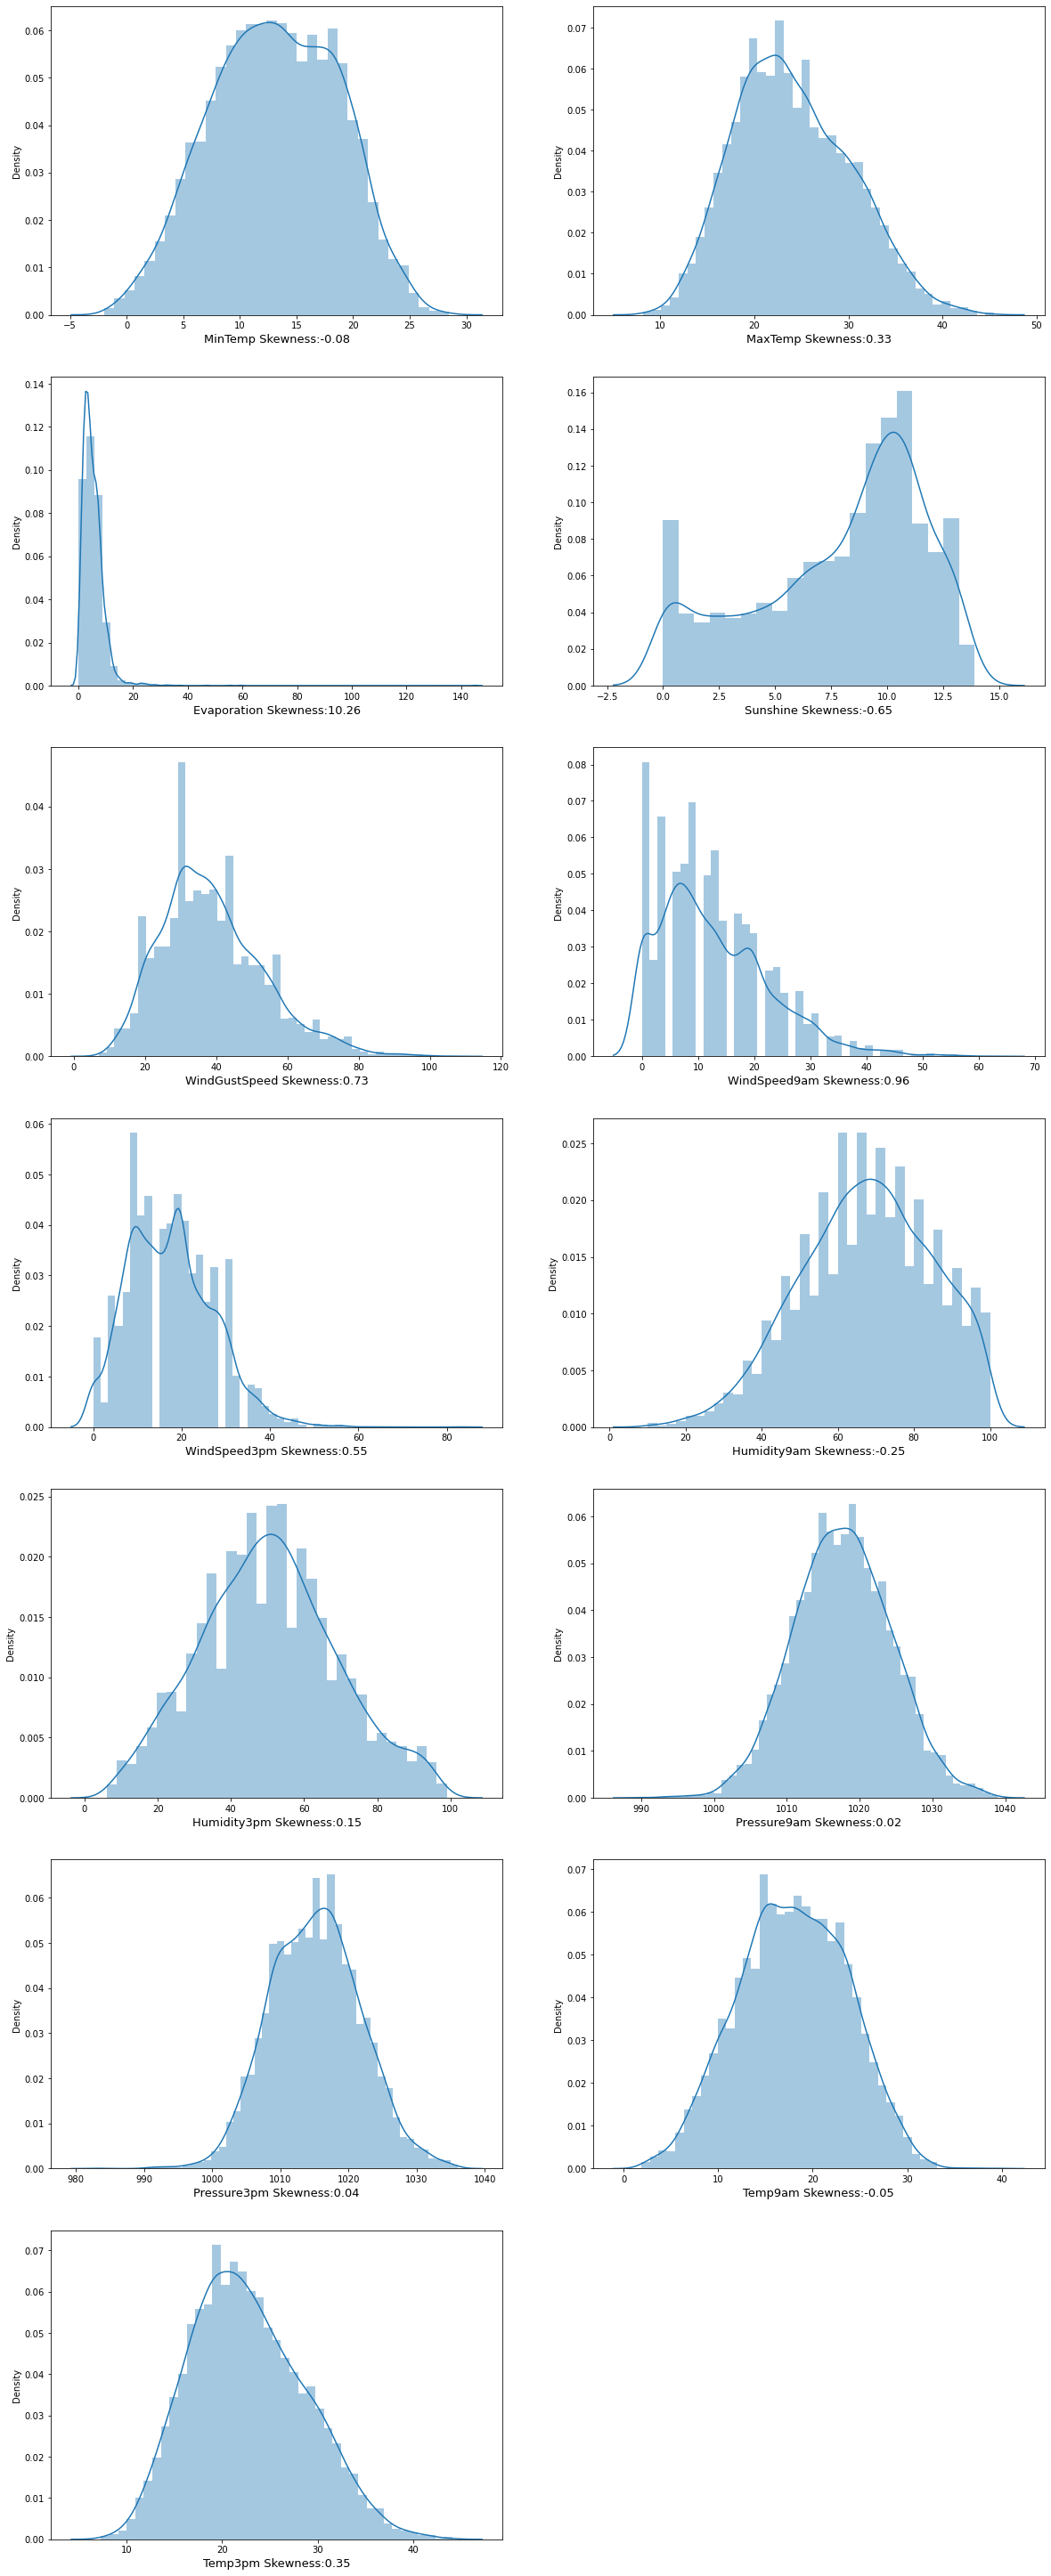

In [6]:
# Distribution plots of the features with continuous data.

df_cont= df[['MinTemp','MaxTemp','Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Temp9am','Temp3pm']]
plt.figure(figsize=(20,60))
plotnumber=1
for column in df_cont:
    if plotnumber<=16:
        ax= plt.subplot(8,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column+' '+'Skewness:'+str(round(df[column].skew(),2)),fontsize=13)
    plotnumber+=1
plt.show()

# 'Evaporation' column is highly skewed towards right.
# 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm' are right skewed and 'Sunshine' is left skewed

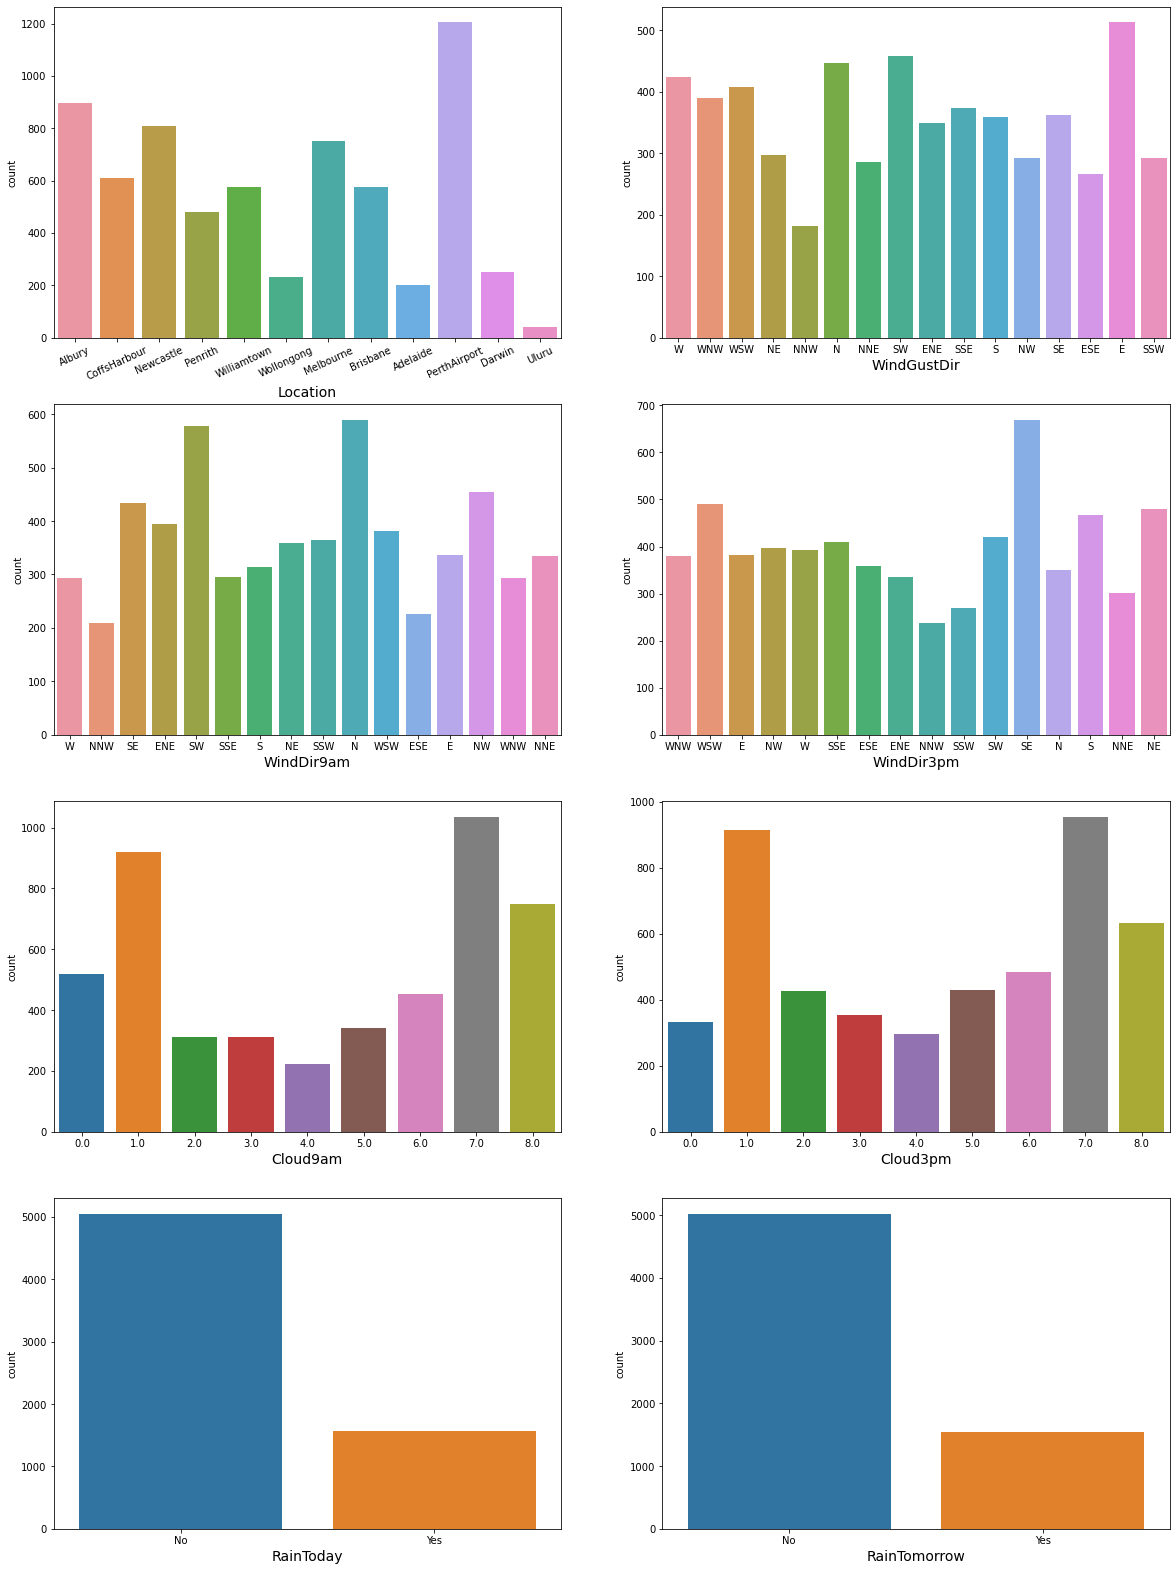

In [7]:
# Count-plots of the features with categorical data.
df_cat=df[['Location','WindGustDir','WindDir9am','WindDir3pm','Cloud9am', 'Cloud3pm','RainToday','RainTomorrow']]
plt.figure(figsize=(20,28))
plotnumber=1
for column in df_cat:
    if plotnumber<=8:
        ax= plt.subplot(4,2,plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column,fontsize=14)
        if column == 'Location':
            plt.xticks(rotation=25)
    plotnumber+=1
plt.show()

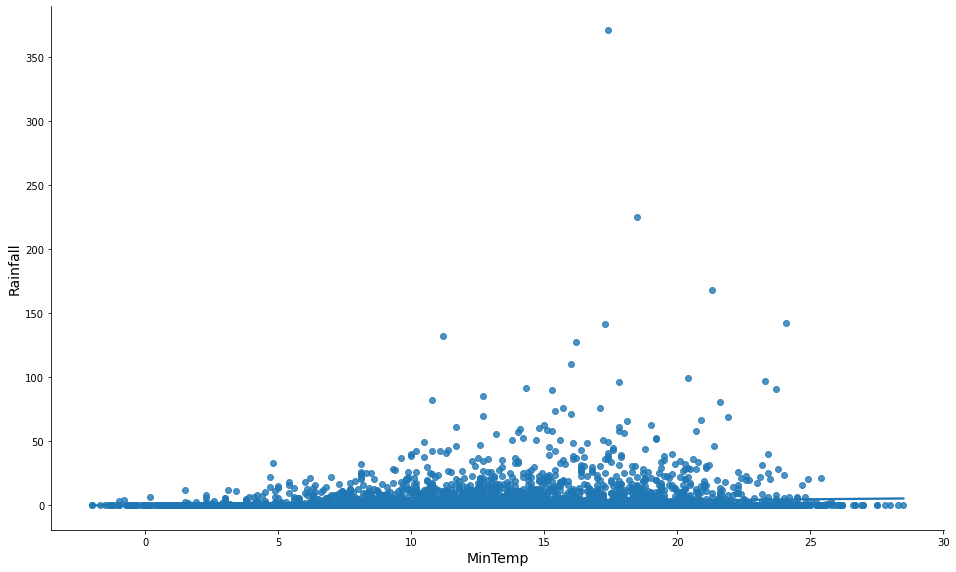

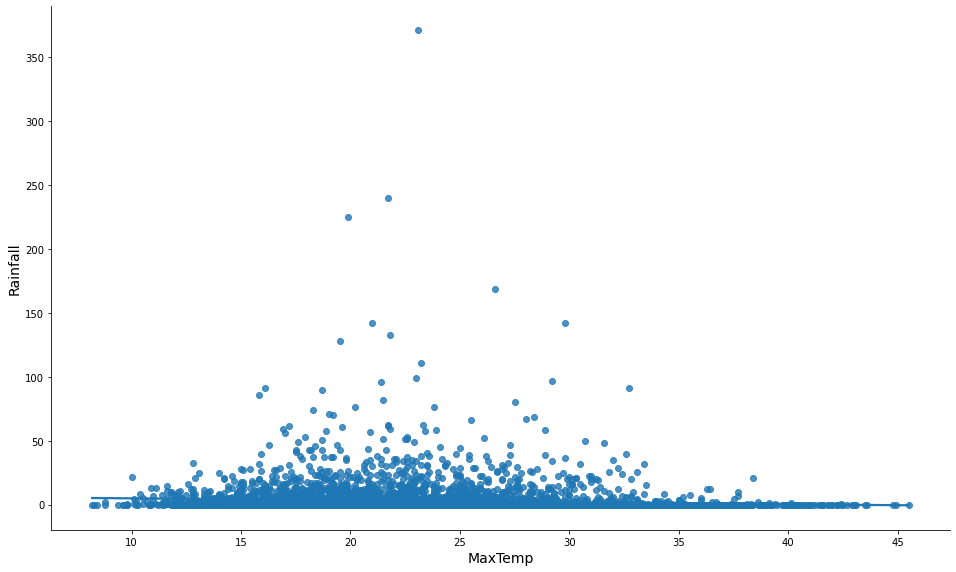

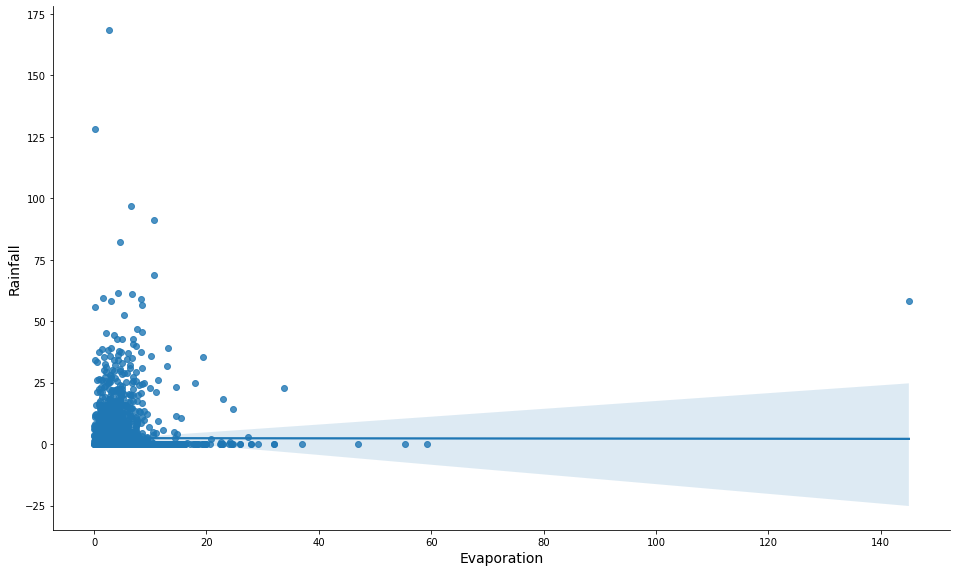

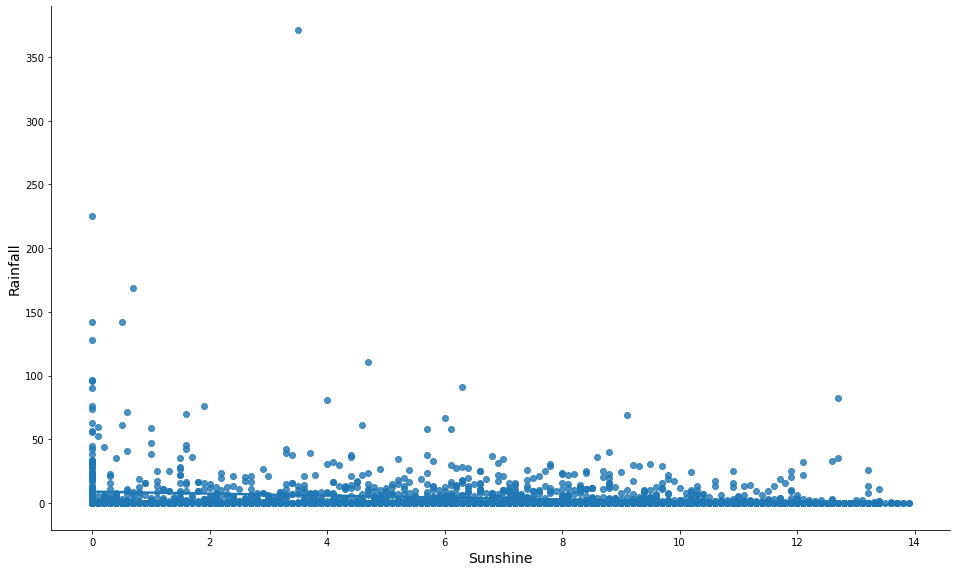

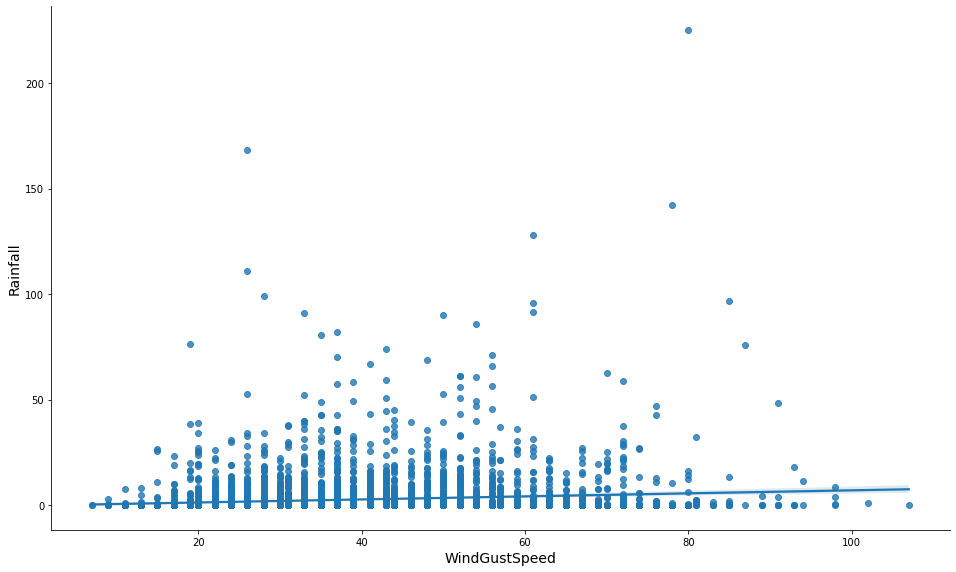

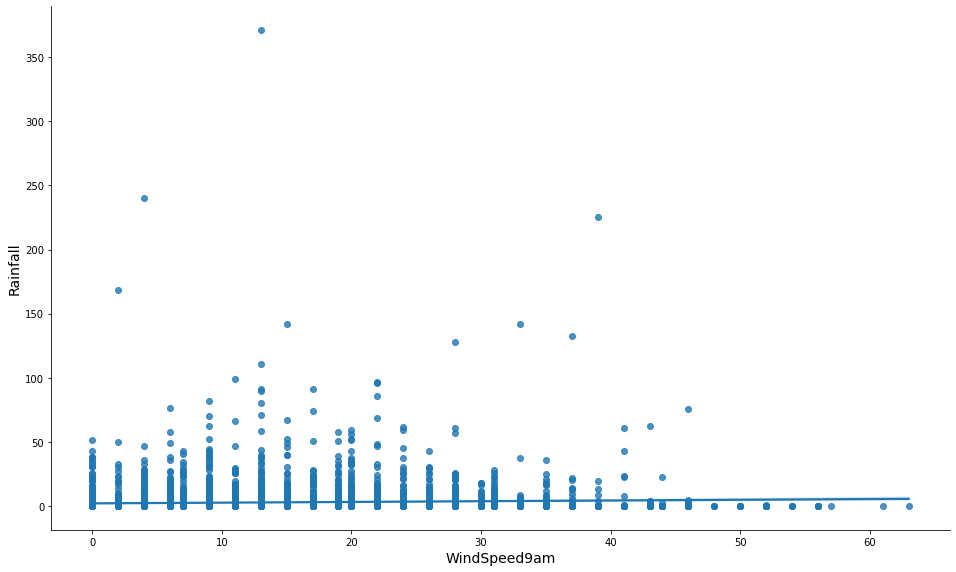

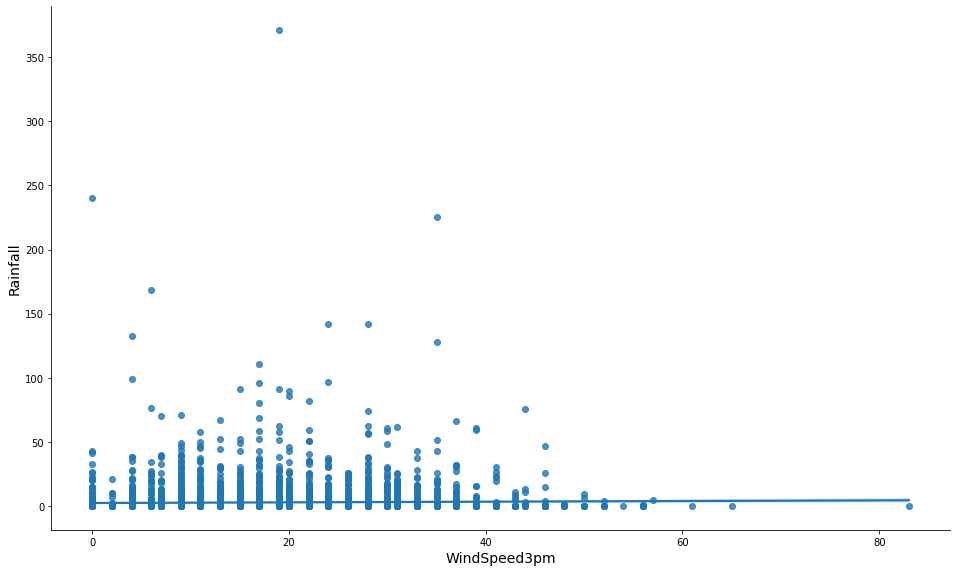

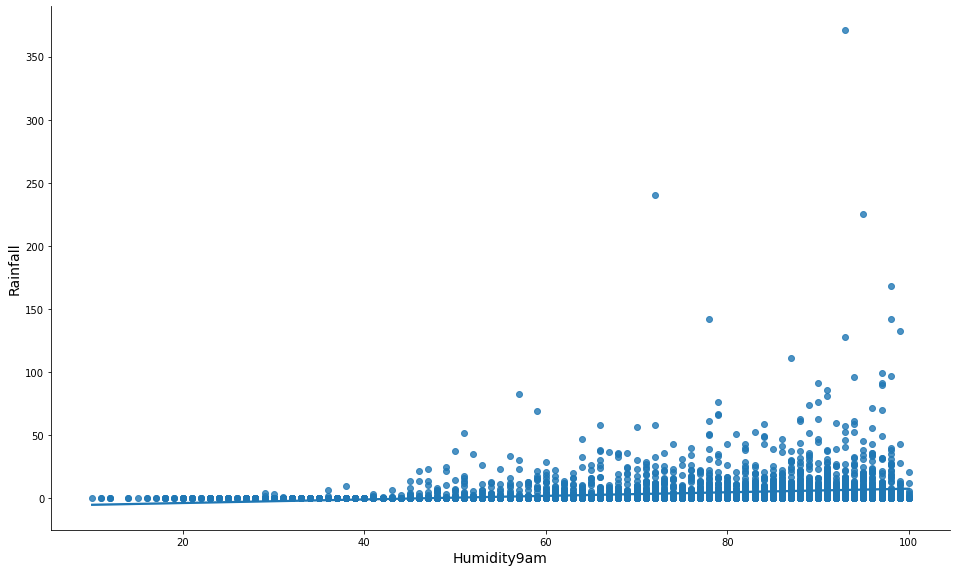

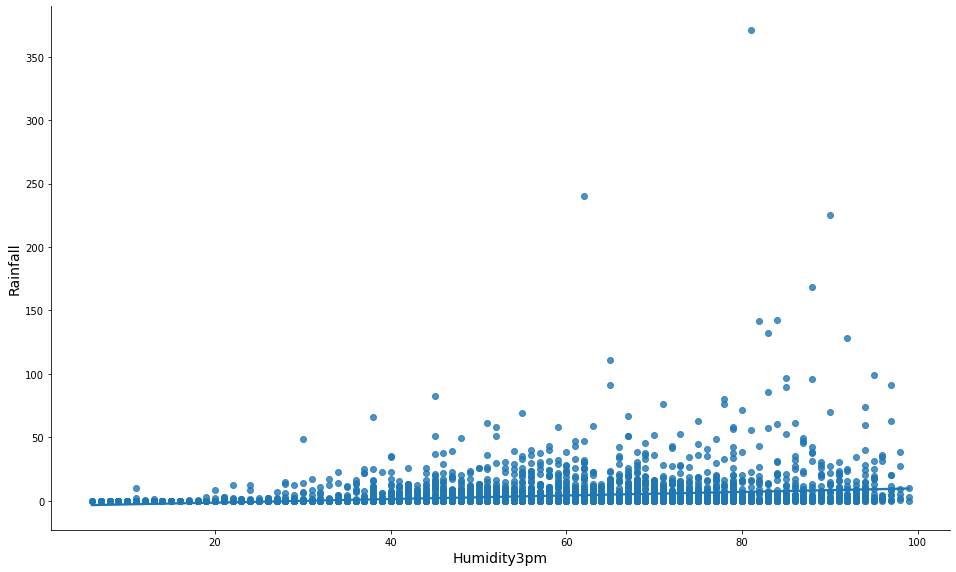

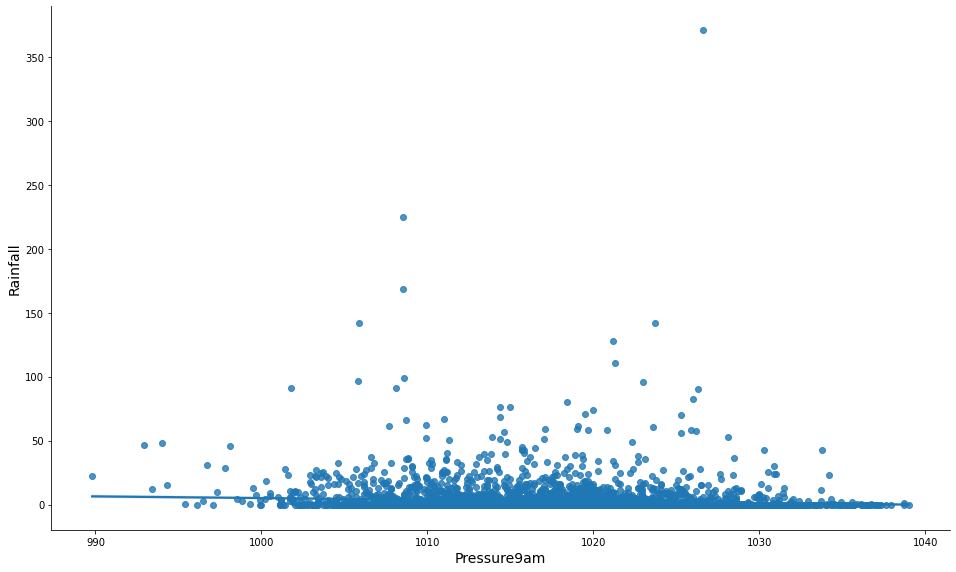

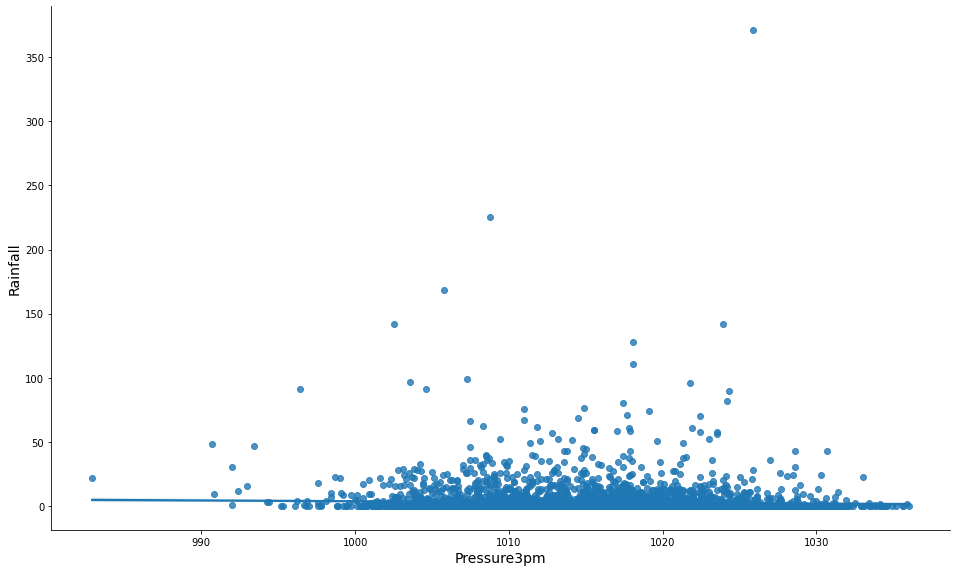

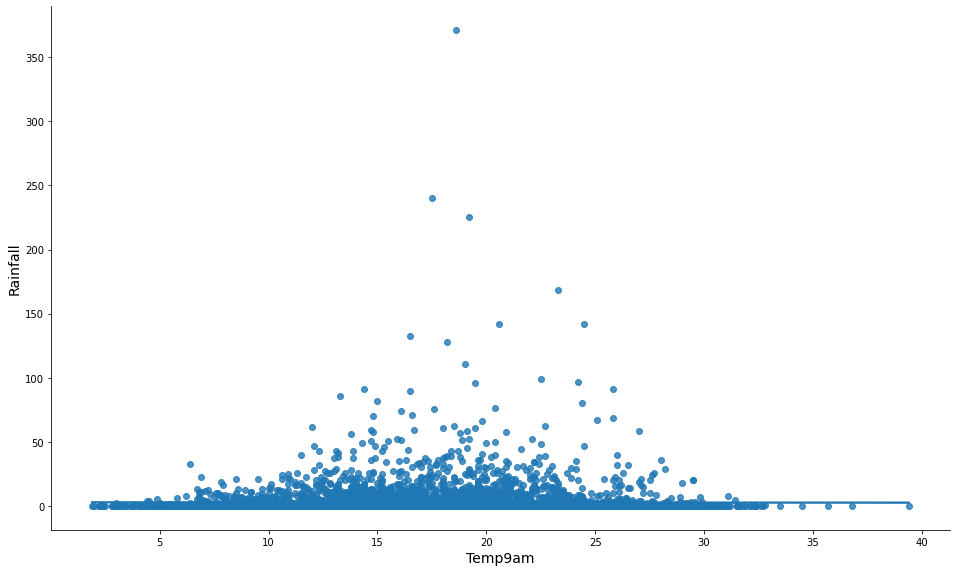

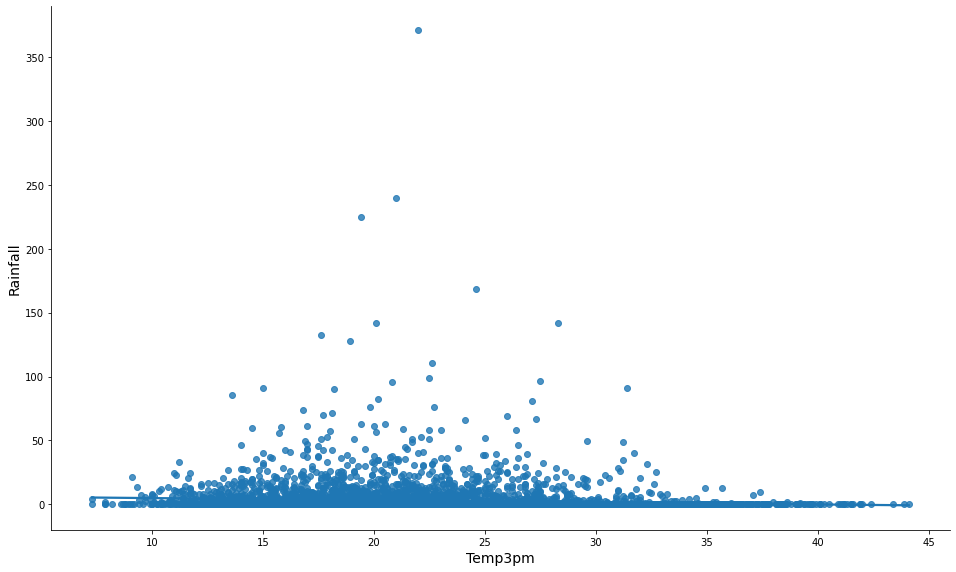

In [8]:
# lm-plots of our continuous features vs target variable i.e 'Rainfall'
for i in enumerate(df_cont):
    sns.lmplot(y='Rainfall',x=i[1],data=df,height=8,aspect=5/3)
    plt.ylabel('Rainfall',fontsize=14)
    plt.xlabel(i[1],fontsize=14)
    
# Observations:
# 1. All the plots show that the features have almost no relation to target variable as the regression-fit line is almost 
#    horizontal in all the cases.

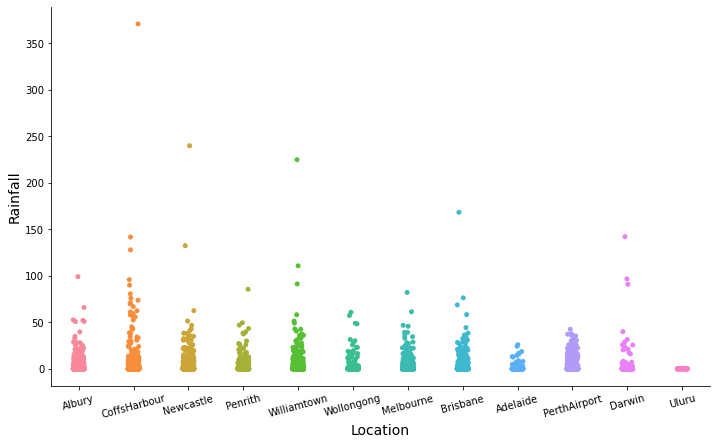

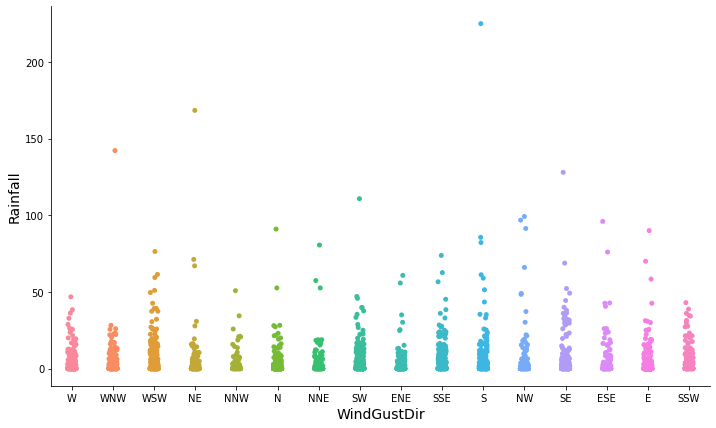

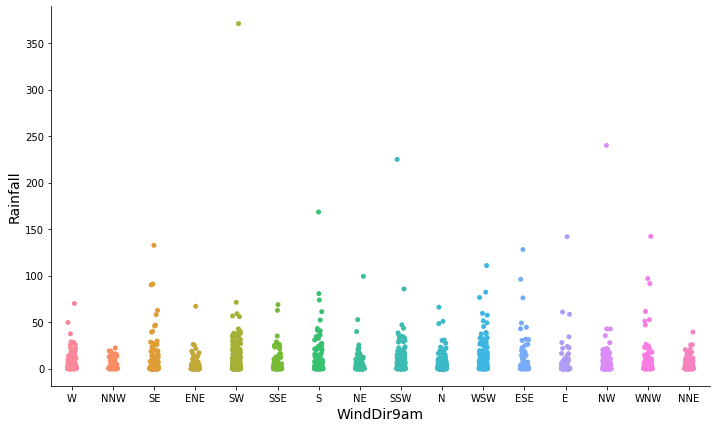

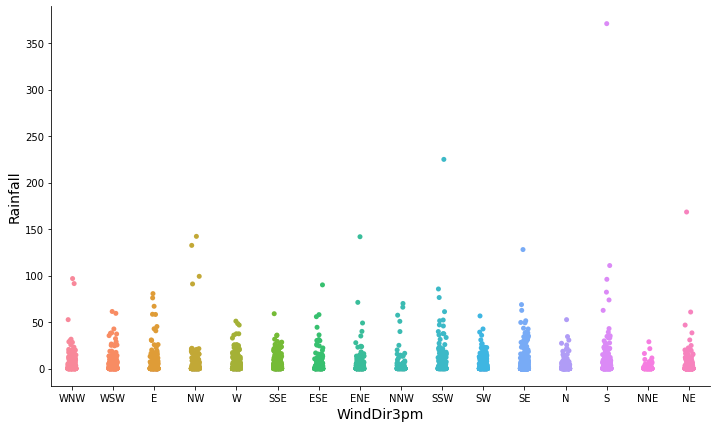

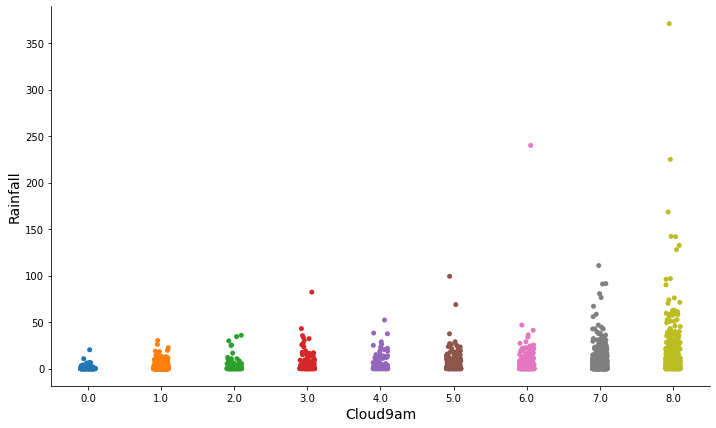

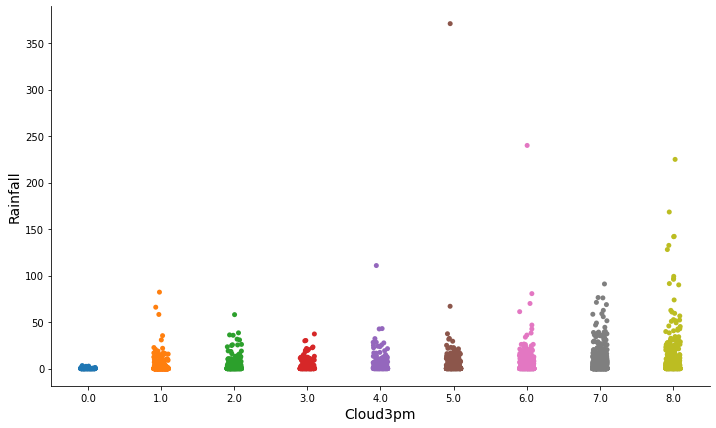

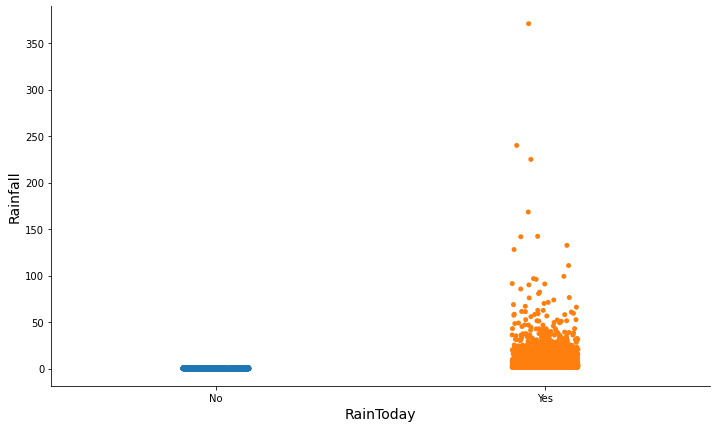

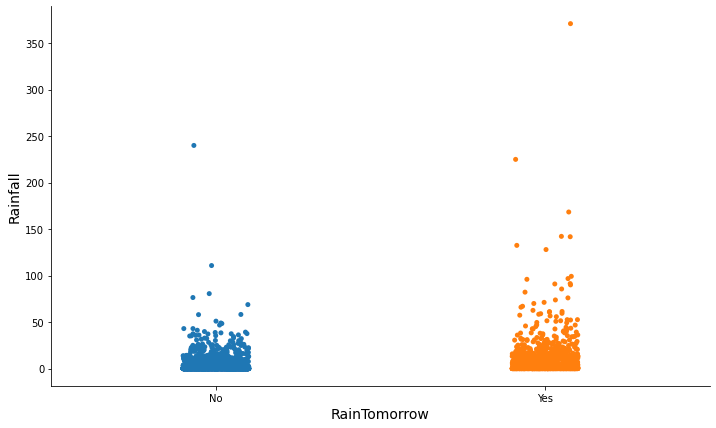

In [9]:
for i in enumerate(df_cat):
    sns.catplot(y='Rainfall',x=i[1],data=df,height=6,aspect=5/3)
    plt.ylabel('Rainfall',fontsize=14)
    plt.xlabel(i[1],fontsize=14)
    if i[1]=='Location':
        plt.xticks(rotation=15)
        
# Observations:
# 1. High cloud cover(value 6 and above) has higher Rainfall.
# 2. 'RainToday' has direct relation with Rainfall.

# Encoding the categorical columns

In [10]:
wind_dir={'N':0, 'NNE':1, 'NE':2, 'ENE':3, 'E':4, 'ESE':5, 'SE':6, 'SSE':7, 'S':8, 'SSW':9,'SW':10,'WSW':11, 'W':12, 'WNW':13,
          'NW':14, 'NNW':15}
df["WindGustDir"] = df["WindGustDir"].map(wind_dir)
df["WindDir9am"] = df["WindDir9am"].map(wind_dir)
df["WindDir3pm"] = df["WindDir3pm"].map(wind_dir)

df['RainToday'] = df['RainToday'].replace({'No':0, 'Yes':1})
df['RainTomorrow'] = df['RainTomorrow'].replace({'No':0, 'Yes':1})

# Encoding the other categorical object datatype columns using Label Encoder.
from sklearn.preprocessing import LabelEncoder
enc= LabelEncoder()
df['Location']= enc.fit_transform(df[['Location']])
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0         1     13.4     22.9       0.6          NaN       NaN         12.0   
1         1      7.4     25.1       0.0          NaN       NaN         13.0   
2         1     12.9     25.7       0.0          NaN       NaN         11.0   
3         1      9.2     28.0       0.0          NaN       NaN          2.0   
4         1     17.5     32.3       1.0          NaN       NaN         12.0   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure3pm  Cloud9am  \
0           44.0        12.0        13.0  ...       1007.1       8.0   
1           44.0        15.0        11.0  ...       1007.8       NaN   
2           46.0        12.0        11.0  ...       1008.7       NaN   
3           24.0         6.0         4.0  ...       1012.8       NaN   
4           41.0         3.0        14.0  ...       1006.0       7.0   

   Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  Day  Month  Year  
0       NaN     16.9     21.8          0           0.0    1     12  2008  
1       NaN     17.2     24.3          0           0.0    2     12  2008  
2       2.0     21.0     23.2          0           0.0    3     12  2008  
3       NaN     18.1     26.5          0           0.0    4     12  2008  
4       8.0     17.8     29.7          0           0.0    5     12  2008  

[5 rows x 25 columns]

# Correlation

<AxesSubplot:>

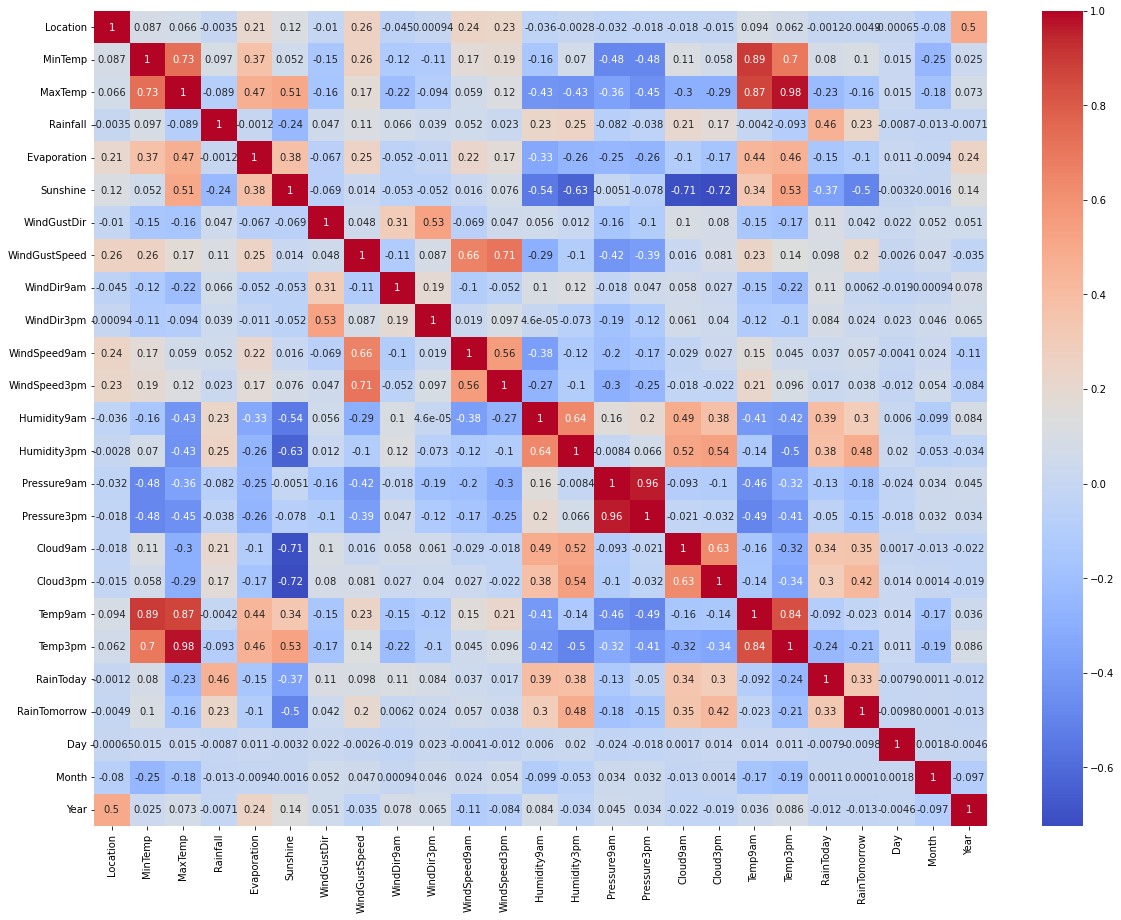

In [11]:
# Let's see the correlation heat-map.
corr=df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# The temperature related columns have a multicollinearity problem. 
# Pressure9am and Pressure3pm have a multicollinearity problem.
# We already saw this in the previous task.

# Imputation of missing values

In [12]:
cont_features=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 
            'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']
cat_features=['WindGustDir', 'WindDir9am', 'WindDir3pm','Cloud9am', 'Cloud3pm','RainToday', 'RainTomorrow']

for i in cont_features:
    df[i]= df[i].fillna(df[i].mean())
    
for i in cat_features:
    df[i]= df[i].fillna(df[i].mode()[0])
df.isnull().sum().sum()

0

# Data Transformation

In [13]:
# Check skewness in continuous data columns
df_cont=df[cont_features]
np.abs(df_cont.skew()).sort_values(ascending=False)

Evaporation      13.584520
Rainfall         13.510350
WindSpeed9am      0.964568
Sunshine          0.896776
WindGustSpeed     0.785354
WindSpeed3pm      0.556250
Temp3pm           0.347092
MaxTemp           0.329059
Humidity9am       0.251989
Humidity3pm       0.153809
MinTemp           0.075520
Pressure3pm       0.047797
Temp9am           0.046061
Pressure9am       0.021270
dtype: float64

In [14]:
# Using power transformer to reduce skewness.
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method="yeo-johnson")

df['Evaporation']= pt.fit_transform(df[['Evaporation']])
df['WindSpeed9am']= pt.fit_transform(df[['WindSpeed9am']])
df['WindGustSpeed']= pt.fit_transform(df[['WindGustSpeed']])
df['Sunshine']= pt.fit_transform(df[['Sunshine']])
df['WindSpeed3pm']= pt.fit_transform(df[['WindSpeed3pm']])
df[['Evaporation','WindSpeed9am','WindGustSpeed','Sunshine','WindSpeed3pm']].skew()

Evaporation      0.103021
WindSpeed9am    -0.099801
WindGustSpeed    0.013343
Sunshine        -0.069867
WindSpeed3pm    -0.039380
dtype: float64

# Feature Selection

In [15]:
np.abs(corr["Rainfall"]).sort_values(ascending= False)

Rainfall         1.000000
RainToday        0.460619
Humidity3pm      0.245858
Sunshine         0.235263
Humidity9am      0.230801
RainTomorrow     0.228574
Cloud9am         0.205457
Cloud3pm         0.170861
WindGustSpeed    0.114417
MinTemp          0.096920
Temp3pm          0.093096
MaxTemp          0.088644
Pressure9am      0.081876
WindDir9am       0.065864
WindSpeed9am     0.052404
WindGustDir      0.047263
WindDir3pm       0.038953
Pressure3pm      0.038247
WindSpeed3pm     0.022983
Month            0.013102
Day              0.008746
Year             0.007076
Temp9am          0.004216
Location         0.003540
Evaporation      0.001197
Name: Rainfall, dtype: float64

In [16]:
df.drop(columns=['Evaporation','Location','Temp9am','Year','Day','Month','WindSpeed3pm','WindDir3pm','WindGustDir',
                 'Pressure3pm','MinTemp','MaxTemp'],inplace=True)

In [17]:
# Separating the features and label.
X= df.drop(columns=['Rainfall'])
y= df['Rainfall']

In [18]:
# applying standard scaler on the features and scaling them.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

# No multicollinearity issues can be seen.

         vif       Features
0   1.849202       Sunshine
1   1.740529  WindGustSpeed
2   1.130512     WindDir9am
3   1.735583   WindSpeed9am
4   2.435937    Humidity9am
5   2.348809    Humidity3pm
6   1.386442    Pressure9am
7   1.969059       Cloud9am
8   1.960488       Cloud3pm
9   1.667674        Temp3pm
10  1.357993      RainToday
11  1.474263   RainTomorrow


# Regression Algorithms and their performance evaluation

In [19]:
############################################### LINEAR REGRESSION ##############################################################

from sklearn.linear_model import LinearRegression
lr= LinearRegression()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    lr.fit(x_train,y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 26.81
Testing Score for sample 0 : 15.13
Mean Absolute Error 3.1
Root Mean Squared Error 12.35


Training Score for sample 1 : 25.96
Testing Score for sample 1 : 17.26
Mean Absolute Error 3.39
Root Mean Squared Error 12.53


Training Score for sample 2 : 29.83
Testing Score for sample 2 : 14.03
Mean Absolute Error 3.64
Root Mean Squared Error 14.5


Training Score for sample 3 : 22.29
Testing Score for sample 3 : 26.81
Mean Absolute Error 3.15
Root Mean Squared Error 8.32


Training Score for sample 4 : 22.55
Testing Score for sample 4 : 26.12
Mean Absolute Error 3.01
Root Mean Squared Error 7.64


Training Score for sample 5 : 23.28
Testing Score for sample 5 : 22.23
Mean Absolute Error 3.04
Root Mean Squared Error 9.44


Training Score for sample 6 : 25.76
Testing Score for sample 6 : 16.13
Mean Absolute Error 3.03
Root Mean Squared Error 11.48


Training Score for sample 7 : 22.41
Testing Score for sample 7 : 28.03
Mean Absolute Error 2.92
Root Mean Squ

In [27]:
############################################## RANDOM FOREST REGRESSION ########################################################

from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_jobs=-1,max_depth=15)

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    rf.fit(x_train,y_train)

    y_pred_train = rf.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= rf.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 88.62
Testing Score for sample 0 : 21.84
Mean Absolute Error 2.36
Root Mean Squared Error 11.85


Training Score for sample 1 : 89.26
Testing Score for sample 1 : 22.04
Mean Absolute Error 2.85
Root Mean Squared Error 12.16


Training Score for sample 2 : 90.03
Testing Score for sample 2 : 15.37
Mean Absolute Error 3.0
Root Mean Squared Error 14.38


Training Score for sample 3 : 89.28
Testing Score for sample 3 : 29.26
Mean Absolute Error 2.47
Root Mean Squared Error 8.18


Training Score for sample 4 : 88.37
Testing Score for sample 4 : 40.23
Mean Absolute Error 2.26
Root Mean Squared Error 6.87


Training Score for sample 5 : 88.16
Testing Score for sample 5 : 45.47
Mean Absolute Error 2.19
Root Mean Squared Error 7.91


Training Score for sample 6 : 88.8
Testing Score for sample 6 : 14.2
Mean Absolute Error 2.42
Root Mean Squared Error 11.61


Training Score for sample 7 : 88.07
Testing Score for sample 7 : 13.97
Mean Absolute Error 2.22
Root Mean Squa

In [21]:
######################################### XTREME-GRADIENT BOOST REGRESSION #####################################################

import xgboost as xgb
xgb_reg= xgb.XGBRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    
    xgb_reg.fit(x_train,y_train)

    y_pred_train = xgb_reg.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= xgb_reg.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 98.28
Testing Score for sample 0 : 21.64
Mean Absolute Error 2.73
Root Mean Squared Error 11.87


Training Score for sample 1 : 98.32
Testing Score for sample 1 : 17.81
Mean Absolute Error 3.22
Root Mean Squared Error 12.49


Training Score for sample 2 : 98.31
Testing Score for sample 2 : 15.15
Mean Absolute Error 3.29
Root Mean Squared Error 14.4


Training Score for sample 3 : 98.54
Testing Score for sample 3 : 23.36
Mean Absolute Error 2.81
Root Mean Squared Error 8.51


Training Score for sample 4 : 98.29
Testing Score for sample 4 : 34.59
Mean Absolute Error 2.52
Root Mean Squared Error 7.19


Training Score for sample 5 : 98.01
Testing Score for sample 5 : 40.28
Mean Absolute Error 2.54
Root Mean Squared Error 8.28


Training Score for sample 6 : 98.35
Testing Score for sample 6 : 13.53
Mean Absolute Error 2.69
Root Mean Squared Error 11.66


Training Score for sample 7 : 98.4
Testing Score for sample 7 : -4.3
Mean Absolute Error 2.54
Root Mean Squa

In [22]:
############################################## K-NEIGHBORS REGRESSION ##########################################################

from sklearn.neighbors import KNeighborsRegressor
knr= KNeighborsRegressor()

for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=i)
   
    knr.fit(x_train,y_train)

    y_pred_train = knr.predict(x_train)
    accuracy_train = r2_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knr.predict(x_test)
    accuracy_test = r2_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))

    print("Mean Absolute Error",round(mean_absolute_error(y_test,y_pred),2))
    print("Root Mean Squared Error",round(np.sqrt(mean_squared_error(y_test,y_pred)),2))
    print("\n")

Training Score for sample 0 : 51.3
Testing Score for sample 0 : 22.62
Mean Absolute Error 2.37
Root Mean Squared Error 11.8


Training Score for sample 1 : 52.22
Testing Score for sample 1 : 19.9
Mean Absolute Error 2.86
Root Mean Squared Error 12.33


Training Score for sample 2 : 58.97
Testing Score for sample 2 : 15.38
Mean Absolute Error 3.1
Root Mean Squared Error 14.38


Training Score for sample 3 : 50.28
Testing Score for sample 3 : 27.92
Mean Absolute Error 2.43
Root Mean Squared Error 8.26


Training Score for sample 4 : 49.71
Testing Score for sample 4 : 8.36
Mean Absolute Error 2.57
Root Mean Squared Error 8.5


Training Score for sample 5 : 45.95
Testing Score for sample 5 : 33.81
Mean Absolute Error 2.35
Root Mean Squared Error 8.71


Training Score for sample 6 : 54.35
Testing Score for sample 6 : 9.45
Mean Absolute Error 2.46
Root Mean Squared Error 11.93


Training Score for sample 7 : 49.18
Testing Score for sample 7 : 29.04
Mean Absolute Error 2.05
Root Mean Squared 

# Cross-validation

In [23]:
# cross-validating the linear regression model.
for i in range(5,11):
    cv_score= cross_val_score(lr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 24.59
the cv score for 6 fold: 25.85
the cv score for 7 fold: 26.14
the cv score for 8 fold: 26.03
the cv score for 9 fold: 26.02
the cv score for 10 fold: 26.13


In [24]:
# cross-validating the random-forests regression model.
for i in range(5,11):
    cv_score= cross_val_score(rf,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 28.34
the cv score for 6 fold: 29.4
the cv score for 7 fold: 22.86
the cv score for 8 fold: 23.28
the cv score for 9 fold: 20.19
the cv score for 10 fold: 24.36


In [25]:
# cross-validating the xgboost regression model.
for i in range(5,11):
    cv_score= cross_val_score(xgb_reg,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 16.86
the cv score for 6 fold: 21.02
the cv score for 7 fold: -14.61
the cv score for 8 fold: 10.58
the cv score for 9 fold: -5.99
the cv score for 10 fold: 15.29


In [26]:
# cross-validating the knn regression model.
for i in range(5,11):
    cv_score= cross_val_score(knr,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 29.6
the cv score for 6 fold: 27.57
the cv score for 7 fold: 23.25
the cv score for 8 fold: 24.67
the cv score for 9 fold: 23.9
the cv score for 10 fold: 25.77


In [ ]:
# All the models are performing poorly.